In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import time
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.utils import shuffle

In [2]:
# Declare Cross-Fold Validation Split / Model Params
N_SPLIT = 10
EPOCHS = 1000
LAYERSIZE = 40

In [3]:
# Define Model

def create_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(12),
        tf.keras.layers.Dense(LAYERSIZE, 'sigmoid'),
        tf.keras.layers.Dense(LAYERSIZE, 'sigmoid'),
        tf.keras.layers.Dense(10257)
    ])
    
    model.compile(optimizer = 'adam', loss = 'mse')
    
    return model

In [4]:
# Read Data
xdf = pd.read_csv('ML_inputs_tear.csv')
ydf = pd.read_csv('U_tear.csv')

# Adding Constant Parameters to X data
xdf.insert(0, 'c', 6)
xdf.insert(1, 'D', .05)
xdf.insert(2, 'k1', 15)
xdf.insert(3, 'k2', 15)
xdf.insert(4, 'N', 2)
xdf.insert(5, 'kappa_1', .25)
xdf.insert(6, 'kappa_2', .25)
xdf.insert(7, 'kappa_3', .25)

In [5]:
# Convert to Array
x = xdf.to_numpy()
y = ydf.T.to_numpy()

In [6]:
totaltime = []
annmodels = []
test_val = []
acc = []
train_val = []

for train_index, test_index in model_selection.KFold(N_SPLIT, shuffle=True).split(x):
    xtrain, xtest = x[train_index], x[test_index]
    ytrain, ytest = y[train_index], y[test_index]
    
    start = time.time()
    model = create_model()
    model.fit(xtrain, ytrain, epochs = EPOCHS, verbose = 2)
    end = time.time()
    
    totaltime.append(end-start)
    
    annmodels.append(model)
    test_val.append((xtest, ytest))
    train_val.append((xtrain, ytrain))
    acc.append(model.evaluate(xtest, ytest))

Epoch 1/1000
7/7 - 1s - loss: 0.0894 - 1s/epoch - 154ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.0436 - 38ms/epoch - 5ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.0251 - 46ms/epoch - 7ms/step
Epoch 4/1000
7/7 - 0s - loss: 0.0184 - 48ms/epoch - 7ms/step
Epoch 5/1000
7/7 - 0s - loss: 0.0152 - 49ms/epoch - 7ms/step
Epoch 6/1000
7/7 - 0s - loss: 0.0133 - 39ms/epoch - 6ms/step
Epoch 7/1000
7/7 - 0s - loss: 0.0119 - 30ms/epoch - 4ms/step
Epoch 8/1000
7/7 - 0s - loss: 0.0108 - 45ms/epoch - 6ms/step
Epoch 9/1000
7/7 - 0s - loss: 0.0099 - 47ms/epoch - 7ms/step
Epoch 10/1000
7/7 - 0s - loss: 0.0093 - 47ms/epoch - 7ms/step
Epoch 11/1000
7/7 - 0s - loss: 0.0088 - 48ms/epoch - 7ms/step
Epoch 12/1000
7/7 - 0s - loss: 0.0082 - 47ms/epoch - 7ms/step
Epoch 13/1000
7/7 - 0s - loss: 0.0079 - 48ms/epoch - 7ms/step
Epoch 14/1000
7/7 - 0s - loss: 0.0076 - 48ms/epoch - 7ms/step
Epoch 15/1000
7/7 - 0s - loss: 0.0072 - 47ms/epoch - 7ms/step
Epoch 16/1000
7/7 - 0s - loss: 0.0069 - 48ms/epoch - 7ms/step
Epoch 17/1000
7/7

Epoch 129/1000
7/7 - 0s - loss: 1.5742e-04 - 54ms/epoch - 8ms/step
Epoch 130/1000
7/7 - 0s - loss: 1.5291e-04 - 64ms/epoch - 9ms/step
Epoch 131/1000
7/7 - 0s - loss: 1.4842e-04 - 53ms/epoch - 8ms/step
Epoch 132/1000
7/7 - 0s - loss: 1.4541e-04 - 49ms/epoch - 7ms/step
Epoch 133/1000
7/7 - 0s - loss: 1.4079e-04 - 47ms/epoch - 7ms/step
Epoch 134/1000
7/7 - 0s - loss: 1.3877e-04 - 49ms/epoch - 7ms/step
Epoch 135/1000
7/7 - 0s - loss: 1.3592e-04 - 46ms/epoch - 7ms/step
Epoch 136/1000
7/7 - 0s - loss: 1.3806e-04 - 49ms/epoch - 7ms/step
Epoch 137/1000
7/7 - 0s - loss: 1.4006e-04 - 48ms/epoch - 7ms/step
Epoch 138/1000
7/7 - 0s - loss: 1.3238e-04 - 46ms/epoch - 7ms/step
Epoch 139/1000
7/7 - 0s - loss: 1.2888e-04 - 51ms/epoch - 7ms/step
Epoch 140/1000
7/7 - 0s - loss: 1.2263e-04 - 50ms/epoch - 7ms/step
Epoch 141/1000
7/7 - 0s - loss: 1.2047e-04 - 47ms/epoch - 7ms/step
Epoch 142/1000
7/7 - 0s - loss: 1.1746e-04 - 51ms/epoch - 7ms/step
Epoch 143/1000
7/7 - 0s - loss: 1.1678e-04 - 46ms/epoch - 7ms/

Epoch 252/1000
7/7 - 0s - loss: 3.1690e-05 - 47ms/epoch - 7ms/step
Epoch 253/1000
7/7 - 0s - loss: 3.0465e-05 - 52ms/epoch - 7ms/step
Epoch 254/1000
7/7 - 0s - loss: 3.1379e-05 - 51ms/epoch - 7ms/step
Epoch 255/1000
7/7 - 0s - loss: 3.1448e-05 - 49ms/epoch - 7ms/step
Epoch 256/1000
7/7 - 0s - loss: 3.0263e-05 - 49ms/epoch - 7ms/step
Epoch 257/1000
7/7 - 0s - loss: 2.9730e-05 - 55ms/epoch - 8ms/step
Epoch 258/1000
7/7 - 0s - loss: 2.9156e-05 - 48ms/epoch - 7ms/step
Epoch 259/1000
7/7 - 0s - loss: 2.9129e-05 - 51ms/epoch - 7ms/step
Epoch 260/1000
7/7 - 0s - loss: 2.8607e-05 - 51ms/epoch - 7ms/step
Epoch 261/1000
7/7 - 0s - loss: 2.7948e-05 - 49ms/epoch - 7ms/step
Epoch 262/1000
7/7 - 0s - loss: 2.7796e-05 - 49ms/epoch - 7ms/step
Epoch 263/1000
7/7 - 0s - loss: 2.7907e-05 - 47ms/epoch - 7ms/step
Epoch 264/1000
7/7 - 0s - loss: 2.7454e-05 - 52ms/epoch - 7ms/step
Epoch 265/1000
7/7 - 0s - loss: 2.7181e-05 - 46ms/epoch - 7ms/step
Epoch 266/1000
7/7 - 0s - loss: 2.6873e-05 - 46ms/epoch - 7ms/

Epoch 375/1000
7/7 - 0s - loss: 1.2858e-05 - 43ms/epoch - 6ms/step
Epoch 376/1000
7/7 - 0s - loss: 1.2913e-05 - 40ms/epoch - 6ms/step
Epoch 377/1000
7/7 - 0s - loss: 1.2523e-05 - 42ms/epoch - 6ms/step
Epoch 378/1000
7/7 - 0s - loss: 1.3069e-05 - 45ms/epoch - 6ms/step
Epoch 379/1000
7/7 - 0s - loss: 1.2622e-05 - 41ms/epoch - 6ms/step
Epoch 380/1000
7/7 - 0s - loss: 1.2713e-05 - 42ms/epoch - 6ms/step
Epoch 381/1000
7/7 - 0s - loss: 1.2462e-05 - 43ms/epoch - 6ms/step
Epoch 382/1000
7/7 - 0s - loss: 1.2415e-05 - 44ms/epoch - 6ms/step
Epoch 383/1000
7/7 - 0s - loss: 1.2294e-05 - 43ms/epoch - 6ms/step
Epoch 384/1000
7/7 - 0s - loss: 1.2319e-05 - 40ms/epoch - 6ms/step
Epoch 385/1000
7/7 - 0s - loss: 1.2121e-05 - 40ms/epoch - 6ms/step
Epoch 386/1000
7/7 - 0s - loss: 1.2298e-05 - 43ms/epoch - 6ms/step
Epoch 387/1000
7/7 - 0s - loss: 1.2445e-05 - 43ms/epoch - 6ms/step
Epoch 388/1000
7/7 - 0s - loss: 1.1508e-05 - 48ms/epoch - 7ms/step
Epoch 389/1000
7/7 - 0s - loss: 1.1767e-05 - 49ms/epoch - 7ms/

Epoch 498/1000
7/7 - 0s - loss: 7.2972e-06 - 64ms/epoch - 9ms/step
Epoch 499/1000
7/7 - 0s - loss: 6.9212e-06 - 58ms/epoch - 8ms/step
Epoch 500/1000
7/7 - 0s - loss: 6.9664e-06 - 58ms/epoch - 8ms/step
Epoch 501/1000
7/7 - 0s - loss: 6.7526e-06 - 61ms/epoch - 9ms/step
Epoch 502/1000
7/7 - 0s - loss: 6.5983e-06 - 60ms/epoch - 9ms/step
Epoch 503/1000
7/7 - 0s - loss: 6.8038e-06 - 60ms/epoch - 9ms/step
Epoch 504/1000
7/7 - 0s - loss: 6.7730e-06 - 65ms/epoch - 9ms/step
Epoch 505/1000
7/7 - 0s - loss: 7.1707e-06 - 57ms/epoch - 8ms/step
Epoch 506/1000
7/7 - 0s - loss: 8.4031e-06 - 62ms/epoch - 9ms/step
Epoch 507/1000
7/7 - 0s - loss: 7.6419e-06 - 56ms/epoch - 8ms/step
Epoch 508/1000
7/7 - 0s - loss: 7.1150e-06 - 58ms/epoch - 8ms/step
Epoch 509/1000
7/7 - 0s - loss: 6.6240e-06 - 62ms/epoch - 9ms/step
Epoch 510/1000
7/7 - 0s - loss: 6.3538e-06 - 60ms/epoch - 9ms/step
Epoch 511/1000
7/7 - 0s - loss: 6.4261e-06 - 56ms/epoch - 8ms/step
Epoch 512/1000
7/7 - 0s - loss: 6.4430e-06 - 50ms/epoch - 7ms/

Epoch 621/1000
7/7 - 0s - loss: 4.1426e-06 - 50ms/epoch - 7ms/step
Epoch 622/1000
7/7 - 0s - loss: 4.2337e-06 - 49ms/epoch - 7ms/step
Epoch 623/1000
7/7 - 0s - loss: 4.5802e-06 - 51ms/epoch - 7ms/step
Epoch 624/1000
7/7 - 0s - loss: 4.4762e-06 - 51ms/epoch - 7ms/step
Epoch 625/1000
7/7 - 0s - loss: 4.5851e-06 - 49ms/epoch - 7ms/step
Epoch 626/1000
7/7 - 0s - loss: 5.1109e-06 - 51ms/epoch - 7ms/step
Epoch 627/1000
7/7 - 0s - loss: 7.3704e-06 - 51ms/epoch - 7ms/step
Epoch 628/1000
7/7 - 0s - loss: 7.0286e-06 - 43ms/epoch - 6ms/step
Epoch 629/1000
7/7 - 0s - loss: 7.4189e-06 - 41ms/epoch - 6ms/step
Epoch 630/1000
7/7 - 0s - loss: 6.7656e-06 - 45ms/epoch - 6ms/step
Epoch 631/1000
7/7 - 0s - loss: 6.3491e-06 - 42ms/epoch - 6ms/step
Epoch 632/1000
7/7 - 0s - loss: 6.0655e-06 - 45ms/epoch - 6ms/step
Epoch 633/1000
7/7 - 0s - loss: 5.9430e-06 - 50ms/epoch - 7ms/step
Epoch 634/1000
7/7 - 0s - loss: 5.8448e-06 - 53ms/epoch - 8ms/step
Epoch 635/1000
7/7 - 0s - loss: 4.5885e-06 - 51ms/epoch - 7ms/

Epoch 744/1000
7/7 - 0s - loss: 3.5628e-06 - 49ms/epoch - 7ms/step
Epoch 745/1000
7/7 - 0s - loss: 3.3602e-06 - 50ms/epoch - 7ms/step
Epoch 746/1000
7/7 - 0s - loss: 3.0336e-06 - 54ms/epoch - 8ms/step
Epoch 747/1000
7/7 - 0s - loss: 2.8492e-06 - 49ms/epoch - 7ms/step
Epoch 748/1000
7/7 - 0s - loss: 2.8200e-06 - 48ms/epoch - 7ms/step
Epoch 749/1000
7/7 - 0s - loss: 2.9673e-06 - 51ms/epoch - 7ms/step
Epoch 750/1000
7/7 - 0s - loss: 2.9142e-06 - 50ms/epoch - 7ms/step
Epoch 751/1000
7/7 - 0s - loss: 3.0672e-06 - 50ms/epoch - 7ms/step
Epoch 752/1000
7/7 - 0s - loss: 3.3497e-06 - 49ms/epoch - 7ms/step
Epoch 753/1000
7/7 - 0s - loss: 3.1771e-06 - 50ms/epoch - 7ms/step
Epoch 754/1000
7/7 - 0s - loss: 3.1940e-06 - 48ms/epoch - 7ms/step
Epoch 755/1000
7/7 - 0s - loss: 2.8423e-06 - 53ms/epoch - 8ms/step
Epoch 756/1000
7/7 - 0s - loss: 2.8208e-06 - 65ms/epoch - 9ms/step
Epoch 757/1000
7/7 - 0s - loss: 2.9617e-06 - 61ms/epoch - 9ms/step
Epoch 758/1000
7/7 - 0s - loss: 4.0488e-06 - 57ms/epoch - 8ms/

Epoch 867/1000
7/7 - 0s - loss: 3.2227e-06 - 43ms/epoch - 6ms/step
Epoch 868/1000
7/7 - 0s - loss: 2.7322e-06 - 45ms/epoch - 6ms/step
Epoch 869/1000
7/7 - 0s - loss: 2.7901e-06 - 42ms/epoch - 6ms/step
Epoch 870/1000
7/7 - 0s - loss: 3.2823e-06 - 42ms/epoch - 6ms/step
Epoch 871/1000
7/7 - 0s - loss: 2.7960e-06 - 45ms/epoch - 6ms/step
Epoch 872/1000
7/7 - 0s - loss: 2.4983e-06 - 45ms/epoch - 6ms/step
Epoch 873/1000
7/7 - 0s - loss: 2.4541e-06 - 45ms/epoch - 6ms/step
Epoch 874/1000
7/7 - 0s - loss: 2.3130e-06 - 39ms/epoch - 6ms/step
Epoch 875/1000
7/7 - 0s - loss: 2.3679e-06 - 43ms/epoch - 6ms/step
Epoch 876/1000
7/7 - 0s - loss: 2.5835e-06 - 45ms/epoch - 6ms/step
Epoch 877/1000
7/7 - 0s - loss: 2.1732e-06 - 46ms/epoch - 7ms/step
Epoch 878/1000
7/7 - 0s - loss: 2.0873e-06 - 46ms/epoch - 7ms/step
Epoch 879/1000
7/7 - 0s - loss: 2.8356e-06 - 46ms/epoch - 7ms/step
Epoch 880/1000
7/7 - 0s - loss: 2.6348e-06 - 45ms/epoch - 6ms/step
Epoch 881/1000
7/7 - 0s - loss: 2.2661e-06 - 43ms/epoch - 6ms/

Epoch 990/1000
7/7 - 0s - loss: 8.1771e-06 - 45ms/epoch - 6ms/step
Epoch 991/1000
7/7 - 0s - loss: 4.9361e-06 - 41ms/epoch - 6ms/step
Epoch 992/1000
7/7 - 0s - loss: 4.8957e-06 - 37ms/epoch - 5ms/step
Epoch 993/1000
7/7 - 0s - loss: 3.4482e-06 - 44ms/epoch - 6ms/step
Epoch 994/1000
7/7 - 0s - loss: 3.1610e-06 - 50ms/epoch - 7ms/step
Epoch 995/1000
7/7 - 0s - loss: 2.2540e-06 - 52ms/epoch - 7ms/step
Epoch 996/1000
7/7 - 0s - loss: 1.6950e-06 - 50ms/epoch - 7ms/step
Epoch 997/1000
7/7 - 0s - loss: 1.7249e-06 - 50ms/epoch - 7ms/step
Epoch 998/1000
7/7 - 0s - loss: 2.1951e-06 - 48ms/epoch - 7ms/step
Epoch 999/1000
7/7 - 0s - loss: 3.3411e-06 - 49ms/epoch - 7ms/step
Epoch 1000/1000
7/7 - 0s - loss: 2.7815e-06 - 52ms/epoch - 7ms/step
1/1 [==============================] - 0s 115ms/step - loss: 2.1502e-06
Epoch 1/1000
7/7 - 0s - loss: 0.0916 - 418ms/epoch - 60ms/step
Epoch 2/1000
7/7 - 0s - loss: 0.0470 - 60ms/epoch - 9ms/step
Epoch 3/1000
7/7 - 0s - loss: 0.0262 - 55ms/epoch - 8ms/step
Epoch

Epoch 116/1000
7/7 - 0s - loss: 1.3235e-04 - 48ms/epoch - 7ms/step
Epoch 117/1000
7/7 - 0s - loss: 1.2807e-04 - 48ms/epoch - 7ms/step
Epoch 118/1000
7/7 - 0s - loss: 1.2595e-04 - 46ms/epoch - 7ms/step
Epoch 119/1000
7/7 - 0s - loss: 1.2262e-04 - 49ms/epoch - 7ms/step
Epoch 120/1000
7/7 - 0s - loss: 1.1847e-04 - 55ms/epoch - 8ms/step
Epoch 121/1000
7/7 - 0s - loss: 1.1512e-04 - 52ms/epoch - 7ms/step
Epoch 122/1000
7/7 - 0s - loss: 1.1309e-04 - 51ms/epoch - 7ms/step
Epoch 123/1000
7/7 - 0s - loss: 1.1110e-04 - 45ms/epoch - 6ms/step
Epoch 124/1000
7/7 - 0s - loss: 1.0939e-04 - 51ms/epoch - 7ms/step
Epoch 125/1000
7/7 - 0s - loss: 1.0658e-04 - 49ms/epoch - 7ms/step
Epoch 126/1000
7/7 - 0s - loss: 1.0576e-04 - 50ms/epoch - 7ms/step
Epoch 127/1000
7/7 - 0s - loss: 1.0337e-04 - 50ms/epoch - 7ms/step
Epoch 128/1000
7/7 - 0s - loss: 1.0056e-04 - 48ms/epoch - 7ms/step
Epoch 129/1000
7/7 - 0s - loss: 1.0182e-04 - 52ms/epoch - 7ms/step
Epoch 130/1000
7/7 - 0s - loss: 1.0085e-04 - 61ms/epoch - 9ms/

Epoch 239/1000
7/7 - 0s - loss: 2.3985e-05 - 47ms/epoch - 7ms/step
Epoch 240/1000
7/7 - 0s - loss: 2.3879e-05 - 43ms/epoch - 6ms/step
Epoch 241/1000
7/7 - 0s - loss: 2.3602e-05 - 49ms/epoch - 7ms/step
Epoch 242/1000
7/7 - 0s - loss: 2.3299e-05 - 51ms/epoch - 7ms/step
Epoch 243/1000
7/7 - 0s - loss: 2.3188e-05 - 47ms/epoch - 7ms/step
Epoch 244/1000
7/7 - 0s - loss: 2.3075e-05 - 46ms/epoch - 7ms/step
Epoch 245/1000
7/7 - 0s - loss: 2.3109e-05 - 47ms/epoch - 7ms/step
Epoch 246/1000
7/7 - 0s - loss: 2.3855e-05 - 56ms/epoch - 8ms/step
Epoch 247/1000
7/7 - 0s - loss: 2.3248e-05 - 48ms/epoch - 7ms/step
Epoch 248/1000
7/7 - 0s - loss: 2.2302e-05 - 47ms/epoch - 7ms/step
Epoch 249/1000
7/7 - 0s - loss: 2.2326e-05 - 50ms/epoch - 7ms/step
Epoch 250/1000
7/7 - 0s - loss: 2.1670e-05 - 62ms/epoch - 9ms/step
Epoch 251/1000
7/7 - 0s - loss: 2.1275e-05 - 56ms/epoch - 8ms/step
Epoch 252/1000
7/7 - 0s - loss: 2.1166e-05 - 59ms/epoch - 8ms/step
Epoch 253/1000
7/7 - 0s - loss: 2.0926e-05 - 65ms/epoch - 9ms/

Epoch 362/1000
7/7 - 0s - loss: 8.2583e-06 - 49ms/epoch - 7ms/step
Epoch 363/1000
7/7 - 0s - loss: 8.2949e-06 - 46ms/epoch - 7ms/step
Epoch 364/1000
7/7 - 0s - loss: 8.0333e-06 - 50ms/epoch - 7ms/step
Epoch 365/1000
7/7 - 0s - loss: 8.1296e-06 - 51ms/epoch - 7ms/step
Epoch 366/1000
7/7 - 0s - loss: 8.4997e-06 - 50ms/epoch - 7ms/step
Epoch 367/1000
7/7 - 0s - loss: 8.3251e-06 - 49ms/epoch - 7ms/step
Epoch 368/1000
7/7 - 0s - loss: 8.0476e-06 - 52ms/epoch - 7ms/step
Epoch 369/1000
7/7 - 0s - loss: 7.9596e-06 - 49ms/epoch - 7ms/step
Epoch 370/1000
7/7 - 0s - loss: 7.7409e-06 - 49ms/epoch - 7ms/step
Epoch 371/1000
7/7 - 0s - loss: 7.8315e-06 - 60ms/epoch - 9ms/step
Epoch 372/1000
7/7 - 0s - loss: 8.1180e-06 - 63ms/epoch - 9ms/step
Epoch 373/1000
7/7 - 0s - loss: 8.1117e-06 - 64ms/epoch - 9ms/step
Epoch 374/1000
7/7 - 0s - loss: 7.6754e-06 - 53ms/epoch - 8ms/step
Epoch 375/1000
7/7 - 0s - loss: 7.5600e-06 - 59ms/epoch - 8ms/step
Epoch 376/1000
7/7 - 0s - loss: 7.6583e-06 - 61ms/epoch - 9ms/

Epoch 485/1000
7/7 - 0s - loss: 4.5226e-06 - 46ms/epoch - 7ms/step
Epoch 486/1000
7/7 - 0s - loss: 4.2856e-06 - 48ms/epoch - 7ms/step
Epoch 487/1000
7/7 - 0s - loss: 4.0891e-06 - 53ms/epoch - 8ms/step
Epoch 488/1000
7/7 - 0s - loss: 3.9883e-06 - 48ms/epoch - 7ms/step
Epoch 489/1000
7/7 - 0s - loss: 3.9709e-06 - 44ms/epoch - 6ms/step
Epoch 490/1000
7/7 - 0s - loss: 4.2433e-06 - 49ms/epoch - 7ms/step
Epoch 491/1000
7/7 - 0s - loss: 4.0394e-06 - 47ms/epoch - 7ms/step
Epoch 492/1000
7/7 - 0s - loss: 3.9709e-06 - 50ms/epoch - 7ms/step
Epoch 493/1000
7/7 - 0s - loss: 4.0911e-06 - 49ms/epoch - 7ms/step
Epoch 494/1000
7/7 - 0s - loss: 3.9903e-06 - 49ms/epoch - 7ms/step
Epoch 495/1000
7/7 - 0s - loss: 4.0350e-06 - 51ms/epoch - 7ms/step
Epoch 496/1000
7/7 - 0s - loss: 4.3722e-06 - 44ms/epoch - 6ms/step
Epoch 497/1000
7/7 - 0s - loss: 4.1285e-06 - 47ms/epoch - 7ms/step
Epoch 498/1000
7/7 - 0s - loss: 4.0238e-06 - 51ms/epoch - 7ms/step
Epoch 499/1000
7/7 - 0s - loss: 3.8516e-06 - 59ms/epoch - 8ms/

Epoch 608/1000
7/7 - 0s - loss: 3.6397e-06 - 44ms/epoch - 6ms/step
Epoch 609/1000
7/7 - 0s - loss: 3.2320e-06 - 47ms/epoch - 7ms/step
Epoch 610/1000
7/7 - 0s - loss: 3.0824e-06 - 47ms/epoch - 7ms/step
Epoch 611/1000
7/7 - 0s - loss: 2.6255e-06 - 51ms/epoch - 7ms/step
Epoch 612/1000
7/7 - 0s - loss: 2.6771e-06 - 48ms/epoch - 7ms/step
Epoch 613/1000
7/7 - 0s - loss: 2.6449e-06 - 49ms/epoch - 7ms/step
Epoch 614/1000
7/7 - 0s - loss: 2.5094e-06 - 52ms/epoch - 7ms/step
Epoch 615/1000
7/7 - 0s - loss: 2.7910e-06 - 51ms/epoch - 7ms/step
Epoch 616/1000
7/7 - 0s - loss: 2.8080e-06 - 49ms/epoch - 7ms/step
Epoch 617/1000
7/7 - 0s - loss: 2.5482e-06 - 52ms/epoch - 7ms/step
Epoch 618/1000
7/7 - 0s - loss: 2.9719e-06 - 48ms/epoch - 7ms/step
Epoch 619/1000
7/7 - 0s - loss: 3.8029e-06 - 47ms/epoch - 7ms/step
Epoch 620/1000
7/7 - 0s - loss: 4.5576e-06 - 51ms/epoch - 7ms/step
Epoch 621/1000
7/7 - 0s - loss: 4.1810e-06 - 48ms/epoch - 7ms/step
Epoch 622/1000
7/7 - 0s - loss: 3.6953e-06 - 54ms/epoch - 8ms/

Epoch 731/1000
7/7 - 0s - loss: 2.7777e-06 - 46ms/epoch - 7ms/step
Epoch 732/1000
7/7 - 0s - loss: 2.1339e-06 - 44ms/epoch - 6ms/step
Epoch 733/1000
7/7 - 0s - loss: 2.2672e-06 - 50ms/epoch - 7ms/step
Epoch 734/1000
7/7 - 0s - loss: 3.2850e-06 - 49ms/epoch - 7ms/step
Epoch 735/1000
7/7 - 0s - loss: 3.9828e-06 - 49ms/epoch - 7ms/step
Epoch 736/1000
7/7 - 0s - loss: 2.5459e-06 - 48ms/epoch - 7ms/step
Epoch 737/1000
7/7 - 0s - loss: 2.0500e-06 - 49ms/epoch - 7ms/step
Epoch 738/1000
7/7 - 0s - loss: 2.1975e-06 - 50ms/epoch - 7ms/step
Epoch 739/1000
7/7 - 0s - loss: 2.1174e-06 - 49ms/epoch - 7ms/step
Epoch 740/1000
7/7 - 0s - loss: 2.0808e-06 - 49ms/epoch - 7ms/step
Epoch 741/1000
7/7 - 0s - loss: 2.4795e-06 - 48ms/epoch - 7ms/step
Epoch 742/1000
7/7 - 0s - loss: 2.3366e-06 - 45ms/epoch - 6ms/step
Epoch 743/1000
7/7 - 0s - loss: 2.7495e-06 - 45ms/epoch - 6ms/step
Epoch 744/1000
7/7 - 0s - loss: 3.4121e-06 - 55ms/epoch - 8ms/step
Epoch 745/1000
7/7 - 0s - loss: 3.4102e-06 - 58ms/epoch - 8ms/

Epoch 854/1000
7/7 - 0s - loss: 3.1639e-06 - 42ms/epoch - 6ms/step
Epoch 855/1000
7/7 - 0s - loss: 2.5957e-06 - 45ms/epoch - 6ms/step
Epoch 856/1000
7/7 - 0s - loss: 2.3437e-06 - 47ms/epoch - 7ms/step
Epoch 857/1000
7/7 - 0s - loss: 2.4189e-06 - 50ms/epoch - 7ms/step
Epoch 858/1000
7/7 - 0s - loss: 2.2492e-06 - 48ms/epoch - 7ms/step
Epoch 859/1000
7/7 - 0s - loss: 1.8555e-06 - 45ms/epoch - 6ms/step
Epoch 860/1000
7/7 - 0s - loss: 1.9401e-06 - 47ms/epoch - 7ms/step
Epoch 861/1000
7/7 - 0s - loss: 1.6653e-06 - 41ms/epoch - 6ms/step
Epoch 862/1000
7/7 - 0s - loss: 1.9688e-06 - 41ms/epoch - 6ms/step
Epoch 863/1000
7/7 - 0s - loss: 1.9792e-06 - 44ms/epoch - 6ms/step
Epoch 864/1000
7/7 - 0s - loss: 2.5872e-06 - 40ms/epoch - 6ms/step
Epoch 865/1000
7/7 - 0s - loss: 2.8780e-06 - 41ms/epoch - 6ms/step
Epoch 866/1000
7/7 - 0s - loss: 2.7383e-06 - 39ms/epoch - 6ms/step
Epoch 867/1000
7/7 - 0s - loss: 3.0498e-06 - 45ms/epoch - 6ms/step
Epoch 868/1000
7/7 - 0s - loss: 3.1901e-06 - 46ms/epoch - 7ms/

Epoch 977/1000
7/7 - 0s - loss: 1.5188e-06 - 47ms/epoch - 7ms/step
Epoch 978/1000
7/7 - 0s - loss: 1.8574e-06 - 47ms/epoch - 7ms/step
Epoch 979/1000
7/7 - 0s - loss: 1.6844e-06 - 45ms/epoch - 6ms/step
Epoch 980/1000
7/7 - 0s - loss: 2.3149e-06 - 50ms/epoch - 7ms/step
Epoch 981/1000
7/7 - 0s - loss: 2.2585e-06 - 48ms/epoch - 7ms/step
Epoch 982/1000
7/7 - 0s - loss: 2.3788e-06 - 49ms/epoch - 7ms/step
Epoch 983/1000
7/7 - 0s - loss: 2.2948e-06 - 51ms/epoch - 7ms/step
Epoch 984/1000
7/7 - 0s - loss: 1.6587e-06 - 49ms/epoch - 7ms/step
Epoch 985/1000
7/7 - 0s - loss: 1.6639e-06 - 50ms/epoch - 7ms/step
Epoch 986/1000
7/7 - 0s - loss: 2.2689e-06 - 53ms/epoch - 8ms/step
Epoch 987/1000
7/7 - 0s - loss: 3.6497e-06 - 49ms/epoch - 7ms/step
Epoch 988/1000
7/7 - 0s - loss: 3.4101e-06 - 45ms/epoch - 6ms/step
Epoch 989/1000
7/7 - 0s - loss: 1.8567e-06 - 48ms/epoch - 7ms/step
Epoch 990/1000
7/7 - 0s - loss: 1.7947e-06 - 48ms/epoch - 7ms/step
Epoch 991/1000
7/7 - 0s - loss: 2.0968e-06 - 48ms/epoch - 7ms/

Epoch 104/1000
7/7 - 0s - loss: 3.2211e-04 - 45ms/epoch - 6ms/step
Epoch 105/1000
7/7 - 0s - loss: 3.1047e-04 - 42ms/epoch - 6ms/step
Epoch 106/1000
7/7 - 0s - loss: 3.0128e-04 - 47ms/epoch - 7ms/step
Epoch 107/1000
7/7 - 0s - loss: 2.9181e-04 - 48ms/epoch - 7ms/step
Epoch 108/1000
7/7 - 0s - loss: 2.8143e-04 - 46ms/epoch - 7ms/step
Epoch 109/1000
7/7 - 0s - loss: 2.7275e-04 - 46ms/epoch - 7ms/step
Epoch 110/1000
7/7 - 0s - loss: 2.6241e-04 - 51ms/epoch - 7ms/step
Epoch 111/1000
7/7 - 0s - loss: 2.5808e-04 - 51ms/epoch - 7ms/step
Epoch 112/1000
7/7 - 0s - loss: 2.5027e-04 - 47ms/epoch - 7ms/step
Epoch 113/1000
7/7 - 0s - loss: 2.3834e-04 - 50ms/epoch - 7ms/step
Epoch 114/1000
7/7 - 0s - loss: 2.3368e-04 - 50ms/epoch - 7ms/step
Epoch 115/1000
7/7 - 0s - loss: 2.2755e-04 - 49ms/epoch - 7ms/step
Epoch 116/1000
7/7 - 0s - loss: 2.1629e-04 - 50ms/epoch - 7ms/step
Epoch 117/1000
7/7 - 0s - loss: 2.0805e-04 - 53ms/epoch - 8ms/step
Epoch 118/1000
7/7 - 0s - loss: 2.0337e-04 - 47ms/epoch - 7ms/

Epoch 227/1000
7/7 - 0s - loss: 3.9701e-05 - 56ms/epoch - 8ms/step
Epoch 228/1000
7/7 - 0s - loss: 3.9326e-05 - 41ms/epoch - 6ms/step
Epoch 229/1000
7/7 - 0s - loss: 3.9120e-05 - 46ms/epoch - 7ms/step
Epoch 230/1000
7/7 - 0s - loss: 3.8407e-05 - 52ms/epoch - 7ms/step
Epoch 231/1000
7/7 - 0s - loss: 3.8115e-05 - 49ms/epoch - 7ms/step
Epoch 232/1000
7/7 - 0s - loss: 3.8292e-05 - 45ms/epoch - 6ms/step
Epoch 233/1000
7/7 - 0s - loss: 3.9038e-05 - 52ms/epoch - 7ms/step
Epoch 234/1000
7/7 - 0s - loss: 3.9114e-05 - 43ms/epoch - 6ms/step
Epoch 235/1000
7/7 - 0s - loss: 3.9070e-05 - 48ms/epoch - 7ms/step
Epoch 236/1000
7/7 - 0s - loss: 3.8739e-05 - 46ms/epoch - 7ms/step
Epoch 237/1000
7/7 - 0s - loss: 3.8669e-05 - 48ms/epoch - 7ms/step
Epoch 238/1000
7/7 - 0s - loss: 3.8071e-05 - 50ms/epoch - 7ms/step
Epoch 239/1000
7/7 - 0s - loss: 3.7147e-05 - 49ms/epoch - 7ms/step
Epoch 240/1000
7/7 - 0s - loss: 3.6371e-05 - 49ms/epoch - 7ms/step
Epoch 241/1000
7/7 - 0s - loss: 3.5363e-05 - 58ms/epoch - 8ms/

Epoch 350/1000
7/7 - 0s - loss: 1.6508e-05 - 53ms/epoch - 8ms/step
Epoch 351/1000
7/7 - 0s - loss: 1.6505e-05 - 60ms/epoch - 9ms/step
Epoch 352/1000
7/7 - 0s - loss: 1.6015e-05 - 48ms/epoch - 7ms/step
Epoch 353/1000
7/7 - 0s - loss: 1.5749e-05 - 51ms/epoch - 7ms/step
Epoch 354/1000
7/7 - 0s - loss: 1.6691e-05 - 48ms/epoch - 7ms/step
Epoch 355/1000
7/7 - 0s - loss: 1.8286e-05 - 55ms/epoch - 8ms/step
Epoch 356/1000
7/7 - 0s - loss: 1.6544e-05 - 45ms/epoch - 6ms/step
Epoch 357/1000
7/7 - 0s - loss: 1.6000e-05 - 51ms/epoch - 7ms/step
Epoch 358/1000
7/7 - 0s - loss: 1.6148e-05 - 47ms/epoch - 7ms/step
Epoch 359/1000
7/7 - 0s - loss: 1.6196e-05 - 50ms/epoch - 7ms/step
Epoch 360/1000
7/7 - 0s - loss: 1.6420e-05 - 45ms/epoch - 6ms/step
Epoch 361/1000
7/7 - 0s - loss: 1.5314e-05 - 47ms/epoch - 7ms/step
Epoch 362/1000
7/7 - 0s - loss: 1.5927e-05 - 49ms/epoch - 7ms/step
Epoch 363/1000
7/7 - 0s - loss: 1.5957e-05 - 49ms/epoch - 7ms/step
Epoch 364/1000
7/7 - 0s - loss: 1.6174e-05 - 48ms/epoch - 7ms/

Epoch 473/1000
7/7 - 0s - loss: 8.1729e-06 - 61ms/epoch - 9ms/step
Epoch 474/1000
7/7 - 0s - loss: 8.1537e-06 - 65ms/epoch - 9ms/step
Epoch 475/1000
7/7 - 0s - loss: 8.0511e-06 - 57ms/epoch - 8ms/step
Epoch 476/1000
7/7 - 0s - loss: 8.0696e-06 - 62ms/epoch - 9ms/step
Epoch 477/1000
7/7 - 0s - loss: 8.0994e-06 - 58ms/epoch - 8ms/step
Epoch 478/1000
7/7 - 0s - loss: 8.4190e-06 - 57ms/epoch - 8ms/step
Epoch 479/1000
7/7 - 0s - loss: 8.2565e-06 - 61ms/epoch - 9ms/step
Epoch 480/1000
7/7 - 0s - loss: 8.1236e-06 - 59ms/epoch - 8ms/step
Epoch 481/1000
7/7 - 0s - loss: 7.9689e-06 - 61ms/epoch - 9ms/step
Epoch 482/1000
7/7 - 0s - loss: 8.5519e-06 - 60ms/epoch - 9ms/step
Epoch 483/1000
7/7 - 0s - loss: 8.9826e-06 - 63ms/epoch - 9ms/step
Epoch 484/1000
7/7 - 0s - loss: 9.4406e-06 - 60ms/epoch - 9ms/step
Epoch 485/1000
7/7 - 0s - loss: 8.0338e-06 - 60ms/epoch - 9ms/step
Epoch 486/1000
7/7 - 0s - loss: 7.8243e-06 - 52ms/epoch - 7ms/step
Epoch 487/1000
7/7 - 0s - loss: 8.8201e-06 - 55ms/epoch - 8ms/

Epoch 596/1000
7/7 - 0s - loss: 6.3638e-06 - 51ms/epoch - 7ms/step
Epoch 597/1000
7/7 - 0s - loss: 5.8422e-06 - 58ms/epoch - 8ms/step
Epoch 598/1000
7/7 - 0s - loss: 5.1520e-06 - 49ms/epoch - 7ms/step
Epoch 599/1000
7/7 - 0s - loss: 5.6064e-06 - 40ms/epoch - 6ms/step
Epoch 600/1000
7/7 - 0s - loss: 5.0638e-06 - 46ms/epoch - 7ms/step
Epoch 601/1000
7/7 - 0s - loss: 4.9307e-06 - 48ms/epoch - 7ms/step
Epoch 602/1000
7/7 - 0s - loss: 5.3549e-06 - 49ms/epoch - 7ms/step
Epoch 603/1000
7/7 - 0s - loss: 5.1052e-06 - 47ms/epoch - 7ms/step
Epoch 604/1000
7/7 - 0s - loss: 5.0641e-06 - 47ms/epoch - 7ms/step
Epoch 605/1000
7/7 - 0s - loss: 5.2637e-06 - 48ms/epoch - 7ms/step
Epoch 606/1000
7/7 - 0s - loss: 5.3641e-06 - 58ms/epoch - 8ms/step
Epoch 607/1000
7/7 - 0s - loss: 5.4383e-06 - 57ms/epoch - 8ms/step
Epoch 608/1000
7/7 - 0s - loss: 6.0672e-06 - 55ms/epoch - 8ms/step
Epoch 609/1000
7/7 - 0s - loss: 7.0773e-06 - 53ms/epoch - 8ms/step
Epoch 610/1000
7/7 - 0s - loss: 7.7048e-06 - 50ms/epoch - 7ms/

Epoch 719/1000
7/7 - 0s - loss: 4.9811e-06 - 43ms/epoch - 6ms/step
Epoch 720/1000
7/7 - 0s - loss: 5.1374e-06 - 42ms/epoch - 6ms/step
Epoch 721/1000
7/7 - 0s - loss: 4.3563e-06 - 45ms/epoch - 6ms/step
Epoch 722/1000
7/7 - 0s - loss: 4.1006e-06 - 48ms/epoch - 7ms/step
Epoch 723/1000
7/7 - 0s - loss: 4.4807e-06 - 49ms/epoch - 7ms/step
Epoch 724/1000
7/7 - 0s - loss: 4.2443e-06 - 52ms/epoch - 7ms/step
Epoch 725/1000
7/7 - 0s - loss: 4.2019e-06 - 52ms/epoch - 7ms/step
Epoch 726/1000
7/7 - 0s - loss: 4.2164e-06 - 50ms/epoch - 7ms/step
Epoch 727/1000
7/7 - 0s - loss: 4.5797e-06 - 49ms/epoch - 7ms/step
Epoch 728/1000
7/7 - 0s - loss: 4.3087e-06 - 61ms/epoch - 9ms/step
Epoch 729/1000
7/7 - 0s - loss: 3.4072e-06 - 58ms/epoch - 8ms/step
Epoch 730/1000
7/7 - 0s - loss: 3.3419e-06 - 77ms/epoch - 11ms/step
Epoch 731/1000
7/7 - 0s - loss: 3.7243e-06 - 52ms/epoch - 7ms/step
Epoch 732/1000
7/7 - 0s - loss: 3.7555e-06 - 50ms/epoch - 7ms/step
Epoch 733/1000
7/7 - 0s - loss: 4.4042e-06 - 49ms/epoch - 7ms

Epoch 842/1000
7/7 - 0s - loss: 2.8925e-06 - 44ms/epoch - 6ms/step
Epoch 843/1000
7/7 - 0s - loss: 2.6630e-06 - 48ms/epoch - 7ms/step
Epoch 844/1000
7/7 - 0s - loss: 3.0842e-06 - 47ms/epoch - 7ms/step
Epoch 845/1000
7/7 - 0s - loss: 3.4061e-06 - 49ms/epoch - 7ms/step
Epoch 846/1000
7/7 - 0s - loss: 3.8880e-06 - 49ms/epoch - 7ms/step
Epoch 847/1000
7/7 - 0s - loss: 5.0946e-06 - 70ms/epoch - 10ms/step
Epoch 848/1000
7/7 - 0s - loss: 4.9647e-06 - 59ms/epoch - 8ms/step
Epoch 849/1000
7/7 - 0s - loss: 5.0826e-06 - 58ms/epoch - 8ms/step
Epoch 850/1000
7/7 - 0s - loss: 5.8843e-06 - 61ms/epoch - 9ms/step
Epoch 851/1000
7/7 - 0s - loss: 8.1320e-06 - 61ms/epoch - 9ms/step
Epoch 852/1000
7/7 - 0s - loss: 8.9386e-06 - 59ms/epoch - 8ms/step
Epoch 853/1000
7/7 - 0s - loss: 5.9926e-06 - 52ms/epoch - 7ms/step
Epoch 854/1000
7/7 - 0s - loss: 4.9017e-06 - 51ms/epoch - 7ms/step
Epoch 855/1000
7/7 - 0s - loss: 4.0459e-06 - 47ms/epoch - 7ms/step
Epoch 856/1000
7/7 - 0s - loss: 3.4869e-06 - 48ms/epoch - 7ms

Epoch 965/1000
7/7 - 0s - loss: 2.6018e-06 - 49ms/epoch - 7ms/step
Epoch 966/1000
7/7 - 0s - loss: 2.5265e-06 - 48ms/epoch - 7ms/step
Epoch 967/1000
7/7 - 0s - loss: 3.3091e-06 - 50ms/epoch - 7ms/step
Epoch 968/1000
7/7 - 0s - loss: 2.7397e-06 - 52ms/epoch - 7ms/step
Epoch 969/1000
7/7 - 0s - loss: 2.7887e-06 - 50ms/epoch - 7ms/step
Epoch 970/1000
7/7 - 0s - loss: 2.7335e-06 - 50ms/epoch - 7ms/step
Epoch 971/1000
7/7 - 0s - loss: 3.2691e-06 - 46ms/epoch - 7ms/step
Epoch 972/1000
7/7 - 0s - loss: 3.5373e-06 - 48ms/epoch - 7ms/step
Epoch 973/1000
7/7 - 0s - loss: 4.7995e-06 - 50ms/epoch - 7ms/step
Epoch 974/1000
7/7 - 0s - loss: 4.7814e-06 - 51ms/epoch - 7ms/step
Epoch 975/1000
7/7 - 0s - loss: 3.8370e-06 - 56ms/epoch - 8ms/step
Epoch 976/1000
7/7 - 0s - loss: 3.0914e-06 - 50ms/epoch - 7ms/step
Epoch 977/1000
7/7 - 0s - loss: 3.0545e-06 - 47ms/epoch - 7ms/step
Epoch 978/1000
7/7 - 0s - loss: 2.4790e-06 - 47ms/epoch - 7ms/step
Epoch 979/1000
7/7 - 0s - loss: 3.5416e-06 - 57ms/epoch - 8ms/

Epoch 91/1000
7/7 - 0s - loss: 4.4048e-04 - 42ms/epoch - 6ms/step
Epoch 92/1000
7/7 - 0s - loss: 4.2665e-04 - 40ms/epoch - 6ms/step
Epoch 93/1000
7/7 - 0s - loss: 4.0095e-04 - 46ms/epoch - 7ms/step
Epoch 94/1000
7/7 - 0s - loss: 3.8718e-04 - 52ms/epoch - 7ms/step
Epoch 95/1000
7/7 - 0s - loss: 3.6988e-04 - 52ms/epoch - 7ms/step
Epoch 96/1000
7/7 - 0s - loss: 3.5232e-04 - 49ms/epoch - 7ms/step
Epoch 97/1000
7/7 - 0s - loss: 3.3148e-04 - 50ms/epoch - 7ms/step
Epoch 98/1000
7/7 - 0s - loss: 3.1724e-04 - 49ms/epoch - 7ms/step
Epoch 99/1000
7/7 - 0s - loss: 2.9639e-04 - 44ms/epoch - 6ms/step
Epoch 100/1000
7/7 - 0s - loss: 2.7474e-04 - 49ms/epoch - 7ms/step
Epoch 101/1000
7/7 - 0s - loss: 2.6095e-04 - 48ms/epoch - 7ms/step
Epoch 102/1000
7/7 - 0s - loss: 2.4679e-04 - 49ms/epoch - 7ms/step
Epoch 103/1000
7/7 - 0s - loss: 2.3301e-04 - 49ms/epoch - 7ms/step
Epoch 104/1000
7/7 - 0s - loss: 2.2287e-04 - 47ms/epoch - 7ms/step
Epoch 105/1000
7/7 - 0s - loss: 2.1224e-04 - 49ms/epoch - 7ms/step
Epoc

Epoch 214/1000
7/7 - 0s - loss: 3.4867e-05 - 47ms/epoch - 7ms/step
Epoch 215/1000
7/7 - 0s - loss: 3.3912e-05 - 44ms/epoch - 6ms/step
Epoch 216/1000
7/7 - 0s - loss: 3.3978e-05 - 50ms/epoch - 7ms/step
Epoch 217/1000
7/7 - 0s - loss: 3.3551e-05 - 66ms/epoch - 9ms/step
Epoch 218/1000
7/7 - 0s - loss: 3.3791e-05 - 55ms/epoch - 8ms/step
Epoch 219/1000
7/7 - 0s - loss: 3.3587e-05 - 59ms/epoch - 8ms/step
Epoch 220/1000
7/7 - 0s - loss: 3.3853e-05 - 53ms/epoch - 8ms/step
Epoch 221/1000
7/7 - 0s - loss: 3.2477e-05 - 47ms/epoch - 7ms/step
Epoch 222/1000
7/7 - 0s - loss: 3.2928e-05 - 46ms/epoch - 7ms/step
Epoch 223/1000
7/7 - 0s - loss: 3.2452e-05 - 44ms/epoch - 6ms/step
Epoch 224/1000
7/7 - 0s - loss: 3.1033e-05 - 45ms/epoch - 6ms/step
Epoch 225/1000
7/7 - 0s - loss: 3.1221e-05 - 47ms/epoch - 7ms/step
Epoch 226/1000
7/7 - 0s - loss: 3.0740e-05 - 47ms/epoch - 7ms/step
Epoch 227/1000
7/7 - 0s - loss: 3.0530e-05 - 50ms/epoch - 7ms/step
Epoch 228/1000
7/7 - 0s - loss: 2.9962e-05 - 50ms/epoch - 7ms/

Epoch 337/1000
7/7 - 0s - loss: 1.2776e-05 - 40ms/epoch - 6ms/step
Epoch 338/1000
7/7 - 0s - loss: 1.3113e-05 - 42ms/epoch - 6ms/step
Epoch 339/1000
7/7 - 0s - loss: 1.2733e-05 - 52ms/epoch - 7ms/step
Epoch 340/1000
7/7 - 0s - loss: 1.2290e-05 - 54ms/epoch - 8ms/step
Epoch 341/1000
7/7 - 0s - loss: 1.2661e-05 - 60ms/epoch - 9ms/step
Epoch 342/1000
7/7 - 0s - loss: 1.2369e-05 - 59ms/epoch - 8ms/step
Epoch 343/1000
7/7 - 0s - loss: 1.2173e-05 - 58ms/epoch - 8ms/step
Epoch 344/1000
7/7 - 0s - loss: 1.2354e-05 - 61ms/epoch - 9ms/step
Epoch 345/1000
7/7 - 0s - loss: 1.2317e-05 - 84ms/epoch - 12ms/step
Epoch 346/1000
7/7 - 0s - loss: 1.1942e-05 - 61ms/epoch - 9ms/step
Epoch 347/1000
7/7 - 0s - loss: 1.1732e-05 - 49ms/epoch - 7ms/step
Epoch 348/1000
7/7 - 0s - loss: 1.1354e-05 - 46ms/epoch - 7ms/step
Epoch 349/1000
7/7 - 0s - loss: 1.1301e-05 - 49ms/epoch - 7ms/step
Epoch 350/1000
7/7 - 0s - loss: 1.1837e-05 - 50ms/epoch - 7ms/step
Epoch 351/1000
7/7 - 0s - loss: 1.2123e-05 - 49ms/epoch - 7ms

Epoch 460/1000
7/7 - 0s - loss: 5.5327e-06 - 50ms/epoch - 7ms/step
Epoch 461/1000
7/7 - 0s - loss: 5.5336e-06 - 61ms/epoch - 9ms/step
Epoch 462/1000
7/7 - 0s - loss: 5.5823e-06 - 57ms/epoch - 8ms/step
Epoch 463/1000
7/7 - 0s - loss: 5.4602e-06 - 55ms/epoch - 8ms/step
Epoch 464/1000
7/7 - 0s - loss: 5.2106e-06 - 47ms/epoch - 7ms/step
Epoch 465/1000
7/7 - 0s - loss: 5.0666e-06 - 50ms/epoch - 7ms/step
Epoch 466/1000
7/7 - 0s - loss: 5.4939e-06 - 54ms/epoch - 8ms/step
Epoch 467/1000
7/7 - 0s - loss: 5.0653e-06 - 50ms/epoch - 7ms/step
Epoch 468/1000
7/7 - 0s - loss: 5.0957e-06 - 52ms/epoch - 7ms/step
Epoch 469/1000
7/7 - 0s - loss: 5.1868e-06 - 49ms/epoch - 7ms/step
Epoch 470/1000
7/7 - 0s - loss: 5.1643e-06 - 49ms/epoch - 7ms/step
Epoch 471/1000
7/7 - 0s - loss: 5.2002e-06 - 43ms/epoch - 6ms/step
Epoch 472/1000
7/7 - 0s - loss: 4.9897e-06 - 48ms/epoch - 7ms/step
Epoch 473/1000
7/7 - 0s - loss: 5.1228e-06 - 52ms/epoch - 7ms/step
Epoch 474/1000
7/7 - 0s - loss: 4.9819e-06 - 52ms/epoch - 7ms/

Epoch 583/1000
7/7 - 0s - loss: 2.8902e-06 - 47ms/epoch - 7ms/step
Epoch 584/1000
7/7 - 0s - loss: 3.1974e-06 - 48ms/epoch - 7ms/step
Epoch 585/1000
7/7 - 0s - loss: 3.5058e-06 - 43ms/epoch - 6ms/step
Epoch 586/1000
7/7 - 0s - loss: 3.6656e-06 - 53ms/epoch - 8ms/step
Epoch 587/1000
7/7 - 0s - loss: 3.5422e-06 - 40ms/epoch - 6ms/step
Epoch 588/1000
7/7 - 0s - loss: 3.5556e-06 - 41ms/epoch - 6ms/step
Epoch 589/1000
7/7 - 0s - loss: 3.2901e-06 - 47ms/epoch - 7ms/step
Epoch 590/1000
7/7 - 0s - loss: 3.4295e-06 - 46ms/epoch - 7ms/step
Epoch 591/1000
7/7 - 0s - loss: 3.4937e-06 - 43ms/epoch - 6ms/step
Epoch 592/1000
7/7 - 0s - loss: 2.9940e-06 - 48ms/epoch - 7ms/step
Epoch 593/1000
7/7 - 0s - loss: 3.1978e-06 - 46ms/epoch - 7ms/step
Epoch 594/1000
7/7 - 0s - loss: 3.1003e-06 - 46ms/epoch - 7ms/step
Epoch 595/1000
7/7 - 0s - loss: 3.5156e-06 - 48ms/epoch - 7ms/step
Epoch 596/1000
7/7 - 0s - loss: 4.1875e-06 - 51ms/epoch - 7ms/step
Epoch 597/1000
7/7 - 0s - loss: 4.2399e-06 - 45ms/epoch - 6ms/

Epoch 706/1000
7/7 - 0s - loss: 2.0586e-06 - 43ms/epoch - 6ms/step
Epoch 707/1000
7/7 - 0s - loss: 1.9841e-06 - 51ms/epoch - 7ms/step
Epoch 708/1000
7/7 - 0s - loss: 1.9435e-06 - 50ms/epoch - 7ms/step
Epoch 709/1000
7/7 - 0s - loss: 1.9072e-06 - 48ms/epoch - 7ms/step
Epoch 710/1000
7/7 - 0s - loss: 1.8093e-06 - 46ms/epoch - 7ms/step
Epoch 711/1000
7/7 - 0s - loss: 1.7488e-06 - 51ms/epoch - 7ms/step
Epoch 712/1000
7/7 - 0s - loss: 1.8601e-06 - 53ms/epoch - 8ms/step
Epoch 713/1000
7/7 - 0s - loss: 1.6983e-06 - 47ms/epoch - 7ms/step
Epoch 714/1000
7/7 - 0s - loss: 1.9588e-06 - 52ms/epoch - 7ms/step
Epoch 715/1000
7/7 - 0s - loss: 1.9244e-06 - 49ms/epoch - 7ms/step
Epoch 716/1000
7/7 - 0s - loss: 1.6823e-06 - 48ms/epoch - 7ms/step
Epoch 717/1000
7/7 - 0s - loss: 1.6040e-06 - 45ms/epoch - 6ms/step
Epoch 718/1000
7/7 - 0s - loss: 1.6654e-06 - 50ms/epoch - 7ms/step
Epoch 719/1000
7/7 - 0s - loss: 1.8892e-06 - 47ms/epoch - 7ms/step
Epoch 720/1000
7/7 - 0s - loss: 1.8057e-06 - 49ms/epoch - 7ms/

Epoch 829/1000
7/7 - 0s - loss: 1.8491e-06 - 41ms/epoch - 6ms/step
Epoch 830/1000
7/7 - 0s - loss: 1.5409e-06 - 42ms/epoch - 6ms/step
Epoch 831/1000
7/7 - 0s - loss: 1.5166e-06 - 42ms/epoch - 6ms/step
Epoch 832/1000
7/7 - 0s - loss: 1.3693e-06 - 44ms/epoch - 6ms/step
Epoch 833/1000
7/7 - 0s - loss: 1.8798e-06 - 46ms/epoch - 7ms/step
Epoch 834/1000
7/7 - 0s - loss: 2.0462e-06 - 47ms/epoch - 7ms/step
Epoch 835/1000
7/7 - 0s - loss: 1.7333e-06 - 49ms/epoch - 7ms/step
Epoch 836/1000
7/7 - 0s - loss: 1.5398e-06 - 51ms/epoch - 7ms/step
Epoch 837/1000
7/7 - 0s - loss: 1.5070e-06 - 46ms/epoch - 7ms/step
Epoch 838/1000
7/7 - 0s - loss: 1.6501e-06 - 48ms/epoch - 7ms/step
Epoch 839/1000
7/7 - 0s - loss: 1.5120e-06 - 50ms/epoch - 7ms/step
Epoch 840/1000
7/7 - 0s - loss: 1.4065e-06 - 48ms/epoch - 7ms/step
Epoch 841/1000
7/7 - 0s - loss: 1.3421e-06 - 49ms/epoch - 7ms/step
Epoch 842/1000
7/7 - 0s - loss: 1.3543e-06 - 50ms/epoch - 7ms/step
Epoch 843/1000
7/7 - 0s - loss: 1.6409e-06 - 47ms/epoch - 7ms/

Epoch 952/1000
7/7 - 0s - loss: 3.2264e-06 - 41ms/epoch - 6ms/step
Epoch 953/1000
7/7 - 0s - loss: 2.8701e-06 - 50ms/epoch - 7ms/step
Epoch 954/1000
7/7 - 0s - loss: 5.4373e-06 - 52ms/epoch - 7ms/step
Epoch 955/1000
7/7 - 0s - loss: 4.0374e-06 - 49ms/epoch - 7ms/step
Epoch 956/1000
7/7 - 0s - loss: 4.3105e-06 - 52ms/epoch - 7ms/step
Epoch 957/1000
7/7 - 0s - loss: 6.5586e-06 - 52ms/epoch - 7ms/step
Epoch 958/1000
7/7 - 0s - loss: 6.3253e-06 - 51ms/epoch - 7ms/step
Epoch 959/1000
7/7 - 0s - loss: 3.2164e-06 - 50ms/epoch - 7ms/step
Epoch 960/1000
7/7 - 0s - loss: 3.7244e-06 - 48ms/epoch - 7ms/step
Epoch 961/1000
7/7 - 0s - loss: 2.1205e-06 - 51ms/epoch - 7ms/step
Epoch 962/1000
7/7 - 0s - loss: 1.9036e-06 - 53ms/epoch - 8ms/step
Epoch 963/1000
7/7 - 0s - loss: 1.5047e-06 - 50ms/epoch - 7ms/step
Epoch 964/1000
7/7 - 0s - loss: 1.4823e-06 - 50ms/epoch - 7ms/step
Epoch 965/1000
7/7 - 0s - loss: 1.7432e-06 - 50ms/epoch - 7ms/step
Epoch 966/1000
7/7 - 0s - loss: 1.9684e-06 - 45ms/epoch - 6ms/

Epoch 78/1000
7/7 - 0s - loss: 5.7464e-04 - 44ms/epoch - 6ms/step
Epoch 79/1000
7/7 - 0s - loss: 5.6743e-04 - 42ms/epoch - 6ms/step
Epoch 80/1000
7/7 - 0s - loss: 5.5383e-04 - 48ms/epoch - 7ms/step
Epoch 81/1000
7/7 - 0s - loss: 5.3913e-04 - 51ms/epoch - 7ms/step
Epoch 82/1000
7/7 - 0s - loss: 5.3010e-04 - 49ms/epoch - 7ms/step
Epoch 83/1000
7/7 - 0s - loss: 5.1382e-04 - 51ms/epoch - 7ms/step
Epoch 84/1000
7/7 - 0s - loss: 4.9677e-04 - 53ms/epoch - 8ms/step
Epoch 85/1000
7/7 - 0s - loss: 4.8628e-04 - 51ms/epoch - 7ms/step
Epoch 86/1000
7/7 - 0s - loss: 4.6765e-04 - 51ms/epoch - 7ms/step
Epoch 87/1000
7/7 - 0s - loss: 4.5287e-04 - 48ms/epoch - 7ms/step
Epoch 88/1000
7/7 - 0s - loss: 4.3824e-04 - 48ms/epoch - 7ms/step
Epoch 89/1000
7/7 - 0s - loss: 4.2641e-04 - 52ms/epoch - 7ms/step
Epoch 90/1000
7/7 - 0s - loss: 4.2482e-04 - 57ms/epoch - 8ms/step
Epoch 91/1000
7/7 - 0s - loss: 3.9698e-04 - 61ms/epoch - 9ms/step
Epoch 92/1000
7/7 - 0s - loss: 3.7709e-04 - 59ms/epoch - 8ms/step
Epoch 93/1

Epoch 201/1000
7/7 - 0s - loss: 3.2339e-05 - 41ms/epoch - 6ms/step
Epoch 202/1000
7/7 - 0s - loss: 3.2054e-05 - 50ms/epoch - 7ms/step
Epoch 203/1000
7/7 - 0s - loss: 3.1830e-05 - 44ms/epoch - 6ms/step
Epoch 204/1000
7/7 - 0s - loss: 3.0680e-05 - 41ms/epoch - 6ms/step
Epoch 205/1000
7/7 - 0s - loss: 3.0740e-05 - 39ms/epoch - 6ms/step
Epoch 206/1000
7/7 - 0s - loss: 3.0387e-05 - 43ms/epoch - 6ms/step
Epoch 207/1000
7/7 - 0s - loss: 3.0233e-05 - 41ms/epoch - 6ms/step
Epoch 208/1000
7/7 - 0s - loss: 2.9870e-05 - 38ms/epoch - 5ms/step
Epoch 209/1000
7/7 - 0s - loss: 2.9347e-05 - 40ms/epoch - 6ms/step
Epoch 210/1000
7/7 - 0s - loss: 2.9234e-05 - 43ms/epoch - 6ms/step
Epoch 211/1000
7/7 - 0s - loss: 2.8988e-05 - 43ms/epoch - 6ms/step
Epoch 212/1000
7/7 - 0s - loss: 2.8601e-05 - 37ms/epoch - 5ms/step
Epoch 213/1000
7/7 - 0s - loss: 2.7918e-05 - 38ms/epoch - 5ms/step
Epoch 214/1000
7/7 - 0s - loss: 2.7898e-05 - 39ms/epoch - 6ms/step
Epoch 215/1000
7/7 - 0s - loss: 2.7466e-05 - 44ms/epoch - 6ms/

Epoch 324/1000
7/7 - 0s - loss: 1.1396e-05 - 48ms/epoch - 7ms/step
Epoch 325/1000
7/7 - 0s - loss: 1.1215e-05 - 44ms/epoch - 6ms/step
Epoch 326/1000
7/7 - 0s - loss: 1.1089e-05 - 48ms/epoch - 7ms/step
Epoch 327/1000
7/7 - 0s - loss: 1.1010e-05 - 47ms/epoch - 7ms/step
Epoch 328/1000
7/7 - 0s - loss: 1.0898e-05 - 52ms/epoch - 7ms/step
Epoch 329/1000
7/7 - 0s - loss: 1.0983e-05 - 40ms/epoch - 6ms/step
Epoch 330/1000
7/7 - 0s - loss: 1.1166e-05 - 48ms/epoch - 7ms/step
Epoch 331/1000
7/7 - 0s - loss: 1.1343e-05 - 50ms/epoch - 7ms/step
Epoch 332/1000
7/7 - 0s - loss: 1.0882e-05 - 56ms/epoch - 8ms/step
Epoch 333/1000
7/7 - 0s - loss: 1.0858e-05 - 45ms/epoch - 6ms/step
Epoch 334/1000
7/7 - 0s - loss: 1.1116e-05 - 48ms/epoch - 7ms/step
Epoch 335/1000
7/7 - 0s - loss: 1.1270e-05 - 43ms/epoch - 6ms/step
Epoch 336/1000
7/7 - 0s - loss: 1.0875e-05 - 45ms/epoch - 6ms/step
Epoch 337/1000
7/7 - 0s - loss: 1.0955e-05 - 46ms/epoch - 7ms/step
Epoch 338/1000
7/7 - 0s - loss: 1.1055e-05 - 48ms/epoch - 7ms/

Epoch 447/1000
7/7 - 0s - loss: 5.8647e-06 - 47ms/epoch - 7ms/step
Epoch 448/1000
7/7 - 0s - loss: 5.3919e-06 - 47ms/epoch - 7ms/step
Epoch 449/1000
7/7 - 0s - loss: 5.1763e-06 - 48ms/epoch - 7ms/step
Epoch 450/1000
7/7 - 0s - loss: 5.1591e-06 - 50ms/epoch - 7ms/step
Epoch 451/1000
7/7 - 0s - loss: 5.0905e-06 - 51ms/epoch - 7ms/step
Epoch 452/1000
7/7 - 0s - loss: 5.0181e-06 - 50ms/epoch - 7ms/step
Epoch 453/1000
7/7 - 0s - loss: 4.9968e-06 - 49ms/epoch - 7ms/step
Epoch 454/1000
7/7 - 0s - loss: 4.9284e-06 - 47ms/epoch - 7ms/step
Epoch 455/1000
7/7 - 0s - loss: 5.0483e-06 - 50ms/epoch - 7ms/step
Epoch 456/1000
7/7 - 0s - loss: 5.2245e-06 - 50ms/epoch - 7ms/step
Epoch 457/1000
7/7 - 0s - loss: 4.9196e-06 - 51ms/epoch - 7ms/step
Epoch 458/1000
7/7 - 0s - loss: 5.1825e-06 - 52ms/epoch - 7ms/step
Epoch 459/1000
7/7 - 0s - loss: 5.0541e-06 - 52ms/epoch - 7ms/step
Epoch 460/1000
7/7 - 0s - loss: 5.1452e-06 - 49ms/epoch - 7ms/step
Epoch 461/1000
7/7 - 0s - loss: 4.8729e-06 - 49ms/epoch - 7ms/

Epoch 570/1000
7/7 - 0s - loss: 3.1159e-06 - 46ms/epoch - 7ms/step
Epoch 571/1000
7/7 - 0s - loss: 3.7348e-06 - 50ms/epoch - 7ms/step
Epoch 572/1000
7/7 - 0s - loss: 3.2380e-06 - 51ms/epoch - 7ms/step
Epoch 573/1000
7/7 - 0s - loss: 3.3884e-06 - 50ms/epoch - 7ms/step
Epoch 574/1000
7/7 - 0s - loss: 3.3980e-06 - 48ms/epoch - 7ms/step
Epoch 575/1000
7/7 - 0s - loss: 3.1513e-06 - 52ms/epoch - 7ms/step
Epoch 576/1000
7/7 - 0s - loss: 3.3355e-06 - 47ms/epoch - 7ms/step
Epoch 577/1000
7/7 - 0s - loss: 3.2915e-06 - 47ms/epoch - 7ms/step
Epoch 578/1000
7/7 - 0s - loss: 3.1690e-06 - 48ms/epoch - 7ms/step
Epoch 579/1000
7/7 - 0s - loss: 3.4144e-06 - 48ms/epoch - 7ms/step
Epoch 580/1000
7/7 - 0s - loss: 3.2964e-06 - 51ms/epoch - 7ms/step
Epoch 581/1000
7/7 - 0s - loss: 3.0509e-06 - 49ms/epoch - 7ms/step
Epoch 582/1000
7/7 - 0s - loss: 2.8644e-06 - 49ms/epoch - 7ms/step
Epoch 583/1000
7/7 - 0s - loss: 3.1158e-06 - 47ms/epoch - 7ms/step
Epoch 584/1000
7/7 - 0s - loss: 3.0794e-06 - 49ms/epoch - 7ms/

Epoch 693/1000
7/7 - 0s - loss: 3.0903e-06 - 56ms/epoch - 8ms/step
Epoch 694/1000
7/7 - 0s - loss: 3.7956e-06 - 46ms/epoch - 7ms/step
Epoch 695/1000
7/7 - 0s - loss: 6.2913e-06 - 44ms/epoch - 6ms/step
Epoch 696/1000
7/7 - 0s - loss: 6.1529e-06 - 44ms/epoch - 6ms/step
Epoch 697/1000
7/7 - 0s - loss: 5.1742e-06 - 48ms/epoch - 7ms/step
Epoch 698/1000
7/7 - 0s - loss: 5.6291e-06 - 47ms/epoch - 7ms/step
Epoch 699/1000
7/7 - 0s - loss: 4.7573e-06 - 48ms/epoch - 7ms/step
Epoch 700/1000
7/7 - 0s - loss: 3.9368e-06 - 48ms/epoch - 7ms/step
Epoch 701/1000
7/7 - 0s - loss: 3.1891e-06 - 51ms/epoch - 7ms/step
Epoch 702/1000
7/7 - 0s - loss: 2.8118e-06 - 51ms/epoch - 7ms/step
Epoch 703/1000
7/7 - 0s - loss: 2.7105e-06 - 55ms/epoch - 8ms/step
Epoch 704/1000
7/7 - 0s - loss: 2.9417e-06 - 44ms/epoch - 6ms/step
Epoch 705/1000
7/7 - 0s - loss: 2.7282e-06 - 49ms/epoch - 7ms/step
Epoch 706/1000
7/7 - 0s - loss: 2.4702e-06 - 48ms/epoch - 7ms/step
Epoch 707/1000
7/7 - 0s - loss: 2.4588e-06 - 48ms/epoch - 7ms/

Epoch 816/1000
7/7 - 0s - loss: 2.4939e-06 - 58ms/epoch - 8ms/step
Epoch 817/1000
7/7 - 0s - loss: 1.7376e-06 - 56ms/epoch - 8ms/step
Epoch 818/1000
7/7 - 0s - loss: 1.6908e-06 - 58ms/epoch - 8ms/step
Epoch 819/1000
7/7 - 0s - loss: 1.7788e-06 - 62ms/epoch - 9ms/step
Epoch 820/1000
7/7 - 0s - loss: 1.6342e-06 - 49ms/epoch - 7ms/step
Epoch 821/1000
7/7 - 0s - loss: 1.7991e-06 - 51ms/epoch - 7ms/step
Epoch 822/1000
7/7 - 0s - loss: 1.4459e-06 - 53ms/epoch - 8ms/step
Epoch 823/1000
7/7 - 0s - loss: 1.3200e-06 - 51ms/epoch - 7ms/step
Epoch 824/1000
7/7 - 0s - loss: 1.5887e-06 - 56ms/epoch - 8ms/step
Epoch 825/1000
7/7 - 0s - loss: 1.6749e-06 - 46ms/epoch - 7ms/step
Epoch 826/1000
7/7 - 0s - loss: 1.6458e-06 - 46ms/epoch - 7ms/step
Epoch 827/1000
7/7 - 0s - loss: 1.5675e-06 - 48ms/epoch - 7ms/step
Epoch 828/1000
7/7 - 0s - loss: 1.6295e-06 - 47ms/epoch - 7ms/step
Epoch 829/1000
7/7 - 0s - loss: 1.6508e-06 - 48ms/epoch - 7ms/step
Epoch 830/1000
7/7 - 0s - loss: 1.9704e-06 - 47ms/epoch - 7ms/

Epoch 939/1000
7/7 - 0s - loss: 2.3011e-06 - 45ms/epoch - 6ms/step
Epoch 940/1000
7/7 - 0s - loss: 1.6550e-06 - 52ms/epoch - 7ms/step
Epoch 941/1000
7/7 - 0s - loss: 1.5047e-06 - 64ms/epoch - 9ms/step
Epoch 942/1000
7/7 - 0s - loss: 1.2903e-06 - 60ms/epoch - 9ms/step
Epoch 943/1000
7/7 - 0s - loss: 1.5185e-06 - 63ms/epoch - 9ms/step
Epoch 944/1000
7/7 - 0s - loss: 1.9467e-06 - 61ms/epoch - 9ms/step
Epoch 945/1000
7/7 - 0s - loss: 2.2584e-06 - 57ms/epoch - 8ms/step
Epoch 946/1000
7/7 - 0s - loss: 2.1850e-06 - 60ms/epoch - 9ms/step
Epoch 947/1000
7/7 - 0s - loss: 1.9190e-06 - 65ms/epoch - 9ms/step
Epoch 948/1000
7/7 - 0s - loss: 1.6665e-06 - 61ms/epoch - 9ms/step
Epoch 949/1000
7/7 - 0s - loss: 1.5582e-06 - 57ms/epoch - 8ms/step
Epoch 950/1000
7/7 - 0s - loss: 2.0646e-06 - 53ms/epoch - 8ms/step
Epoch 951/1000
7/7 - 0s - loss: 3.4007e-06 - 47ms/epoch - 7ms/step
Epoch 952/1000
7/7 - 0s - loss: 4.1252e-06 - 50ms/epoch - 7ms/step
Epoch 953/1000
7/7 - 0s - loss: 2.6277e-06 - 48ms/epoch - 7ms/

Epoch 54/1000
7/7 - 0s - loss: 0.0010 - 45ms/epoch - 6ms/step
Epoch 55/1000
7/7 - 0s - loss: 0.0010 - 37ms/epoch - 5ms/step
Epoch 56/1000
7/7 - 0s - loss: 0.0010 - 42ms/epoch - 6ms/step
Epoch 57/1000
7/7 - 0s - loss: 9.8612e-04 - 42ms/epoch - 6ms/step
Epoch 58/1000
7/7 - 0s - loss: 9.4843e-04 - 45ms/epoch - 6ms/step
Epoch 59/1000
7/7 - 0s - loss: 9.2828e-04 - 45ms/epoch - 6ms/step
Epoch 60/1000
7/7 - 0s - loss: 9.0378e-04 - 43ms/epoch - 6ms/step
Epoch 61/1000
7/7 - 0s - loss: 8.8758e-04 - 46ms/epoch - 7ms/step
Epoch 62/1000
7/7 - 0s - loss: 8.7050e-04 - 57ms/epoch - 8ms/step
Epoch 63/1000
7/7 - 0s - loss: 8.5758e-04 - 58ms/epoch - 8ms/step
Epoch 64/1000
7/7 - 0s - loss: 8.4823e-04 - 58ms/epoch - 8ms/step
Epoch 65/1000
7/7 - 0s - loss: 8.3194e-04 - 48ms/epoch - 7ms/step
Epoch 66/1000
7/7 - 0s - loss: 8.1919e-04 - 44ms/epoch - 6ms/step
Epoch 67/1000
7/7 - 0s - loss: 8.1809e-04 - 46ms/epoch - 7ms/step
Epoch 68/1000
7/7 - 0s - loss: 7.9786e-04 - 45ms/epoch - 6ms/step
Epoch 69/1000
7/7 - 0s

7/7 - 0s - loss: 5.4205e-05 - 44ms/epoch - 6ms/step
Epoch 178/1000
7/7 - 0s - loss: 5.3196e-05 - 42ms/epoch - 6ms/step
Epoch 179/1000
7/7 - 0s - loss: 5.2804e-05 - 48ms/epoch - 7ms/step
Epoch 180/1000
7/7 - 0s - loss: 5.2061e-05 - 46ms/epoch - 7ms/step
Epoch 181/1000
7/7 - 0s - loss: 5.2418e-05 - 46ms/epoch - 7ms/step
Epoch 182/1000
7/7 - 0s - loss: 5.0751e-05 - 44ms/epoch - 6ms/step
Epoch 183/1000
7/7 - 0s - loss: 5.0957e-05 - 45ms/epoch - 6ms/step
Epoch 184/1000
7/7 - 0s - loss: 4.9422e-05 - 45ms/epoch - 6ms/step
Epoch 185/1000
7/7 - 0s - loss: 4.8895e-05 - 47ms/epoch - 7ms/step
Epoch 186/1000
7/7 - 0s - loss: 4.9031e-05 - 45ms/epoch - 6ms/step
Epoch 187/1000
7/7 - 0s - loss: 4.8329e-05 - 49ms/epoch - 7ms/step
Epoch 188/1000
7/7 - 0s - loss: 4.8410e-05 - 41ms/epoch - 6ms/step
Epoch 189/1000
7/7 - 0s - loss: 4.7686e-05 - 53ms/epoch - 8ms/step
Epoch 190/1000
7/7 - 0s - loss: 4.7528e-05 - 50ms/epoch - 7ms/step
Epoch 191/1000
7/7 - 0s - loss: 4.6108e-05 - 59ms/epoch - 8ms/step
Epoch 192/

Epoch 300/1000
7/7 - 0s - loss: 1.9434e-05 - 43ms/epoch - 6ms/step
Epoch 301/1000
7/7 - 0s - loss: 1.8788e-05 - 42ms/epoch - 6ms/step
Epoch 302/1000
7/7 - 0s - loss: 1.8711e-05 - 44ms/epoch - 6ms/step
Epoch 303/1000
7/7 - 0s - loss: 1.8796e-05 - 42ms/epoch - 6ms/step
Epoch 304/1000
7/7 - 0s - loss: 1.8952e-05 - 45ms/epoch - 6ms/step
Epoch 305/1000
7/7 - 0s - loss: 1.8223e-05 - 45ms/epoch - 6ms/step
Epoch 306/1000
7/7 - 0s - loss: 1.8090e-05 - 49ms/epoch - 7ms/step
Epoch 307/1000
7/7 - 0s - loss: 1.8227e-05 - 48ms/epoch - 7ms/step
Epoch 308/1000
7/7 - 0s - loss: 1.8413e-05 - 46ms/epoch - 7ms/step
Epoch 309/1000
7/7 - 0s - loss: 1.8085e-05 - 44ms/epoch - 6ms/step
Epoch 310/1000
7/7 - 0s - loss: 1.7575e-05 - 37ms/epoch - 5ms/step
Epoch 311/1000
7/7 - 0s - loss: 1.7624e-05 - 38ms/epoch - 5ms/step
Epoch 312/1000
7/7 - 0s - loss: 1.7096e-05 - 49ms/epoch - 7ms/step
Epoch 313/1000
7/7 - 0s - loss: 1.7016e-05 - 45ms/epoch - 6ms/step
Epoch 314/1000
7/7 - 0s - loss: 1.7028e-05 - 46ms/epoch - 7ms/

Epoch 423/1000
7/7 - 0s - loss: 8.5653e-06 - 45ms/epoch - 6ms/step
Epoch 424/1000
7/7 - 0s - loss: 8.7576e-06 - 46ms/epoch - 7ms/step
Epoch 425/1000
7/7 - 0s - loss: 8.6970e-06 - 44ms/epoch - 6ms/step
Epoch 426/1000
7/7 - 0s - loss: 8.2362e-06 - 43ms/epoch - 6ms/step
Epoch 427/1000
7/7 - 0s - loss: 8.4661e-06 - 47ms/epoch - 7ms/step
Epoch 428/1000
7/7 - 0s - loss: 8.5251e-06 - 44ms/epoch - 6ms/step
Epoch 429/1000
7/7 - 0s - loss: 8.5818e-06 - 44ms/epoch - 6ms/step
Epoch 430/1000
7/7 - 0s - loss: 8.6942e-06 - 49ms/epoch - 7ms/step
Epoch 431/1000
7/7 - 0s - loss: 8.3528e-06 - 46ms/epoch - 7ms/step
Epoch 432/1000
7/7 - 0s - loss: 8.4961e-06 - 43ms/epoch - 6ms/step
Epoch 433/1000
7/7 - 0s - loss: 8.4108e-06 - 46ms/epoch - 7ms/step
Epoch 434/1000
7/7 - 0s - loss: 8.4155e-06 - 45ms/epoch - 6ms/step
Epoch 435/1000
7/7 - 0s - loss: 8.7925e-06 - 48ms/epoch - 7ms/step
Epoch 436/1000
7/7 - 0s - loss: 8.0024e-06 - 48ms/epoch - 7ms/step
Epoch 437/1000
7/7 - 0s - loss: 8.2183e-06 - 42ms/epoch - 6ms/

Epoch 546/1000
7/7 - 0s - loss: 5.5370e-06 - 48ms/epoch - 7ms/step
Epoch 547/1000
7/7 - 0s - loss: 5.4226e-06 - 48ms/epoch - 7ms/step
Epoch 548/1000
7/7 - 0s - loss: 5.0201e-06 - 46ms/epoch - 7ms/step
Epoch 549/1000
7/7 - 0s - loss: 4.8854e-06 - 44ms/epoch - 6ms/step
Epoch 550/1000
7/7 - 0s - loss: 4.4361e-06 - 44ms/epoch - 6ms/step
Epoch 551/1000
7/7 - 0s - loss: 4.8262e-06 - 45ms/epoch - 6ms/step
Epoch 552/1000
7/7 - 0s - loss: 4.9932e-06 - 47ms/epoch - 7ms/step
Epoch 553/1000
7/7 - 0s - loss: 4.9032e-06 - 39ms/epoch - 6ms/step
Epoch 554/1000
7/7 - 0s - loss: 5.2483e-06 - 41ms/epoch - 6ms/step
Epoch 555/1000
7/7 - 0s - loss: 5.6520e-06 - 46ms/epoch - 7ms/step
Epoch 556/1000
7/7 - 0s - loss: 5.3820e-06 - 48ms/epoch - 7ms/step
Epoch 557/1000
7/7 - 0s - loss: 5.5029e-06 - 39ms/epoch - 6ms/step
Epoch 558/1000
7/7 - 0s - loss: 5.1043e-06 - 47ms/epoch - 7ms/step
Epoch 559/1000
7/7 - 0s - loss: 4.8857e-06 - 50ms/epoch - 7ms/step
Epoch 560/1000
7/7 - 0s - loss: 4.2367e-06 - 50ms/epoch - 7ms/

Epoch 669/1000
7/7 - 0s - loss: 3.2374e-06 - 43ms/epoch - 6ms/step
Epoch 670/1000
7/7 - 0s - loss: 4.0125e-06 - 44ms/epoch - 6ms/step
Epoch 671/1000
7/7 - 0s - loss: 4.0444e-06 - 45ms/epoch - 6ms/step
Epoch 672/1000
7/7 - 0s - loss: 4.1881e-06 - 47ms/epoch - 7ms/step
Epoch 673/1000
7/7 - 0s - loss: 3.4374e-06 - 46ms/epoch - 7ms/step
Epoch 674/1000
7/7 - 0s - loss: 2.9654e-06 - 46ms/epoch - 7ms/step
Epoch 675/1000
7/7 - 0s - loss: 3.2334e-06 - 47ms/epoch - 7ms/step
Epoch 676/1000
7/7 - 0s - loss: 3.0764e-06 - 44ms/epoch - 6ms/step
Epoch 677/1000
7/7 - 0s - loss: 3.0032e-06 - 45ms/epoch - 6ms/step
Epoch 678/1000
7/7 - 0s - loss: 3.1086e-06 - 48ms/epoch - 7ms/step
Epoch 679/1000
7/7 - 0s - loss: 3.3954e-06 - 50ms/epoch - 7ms/step
Epoch 680/1000
7/7 - 0s - loss: 4.2933e-06 - 51ms/epoch - 7ms/step
Epoch 681/1000
7/7 - 0s - loss: 4.3501e-06 - 38ms/epoch - 5ms/step
Epoch 682/1000
7/7 - 0s - loss: 4.0135e-06 - 41ms/epoch - 6ms/step
Epoch 683/1000
7/7 - 0s - loss: 4.9953e-06 - 41ms/epoch - 6ms/

Epoch 792/1000
7/7 - 0s - loss: 3.4354e-06 - 52ms/epoch - 7ms/step
Epoch 793/1000
7/7 - 0s - loss: 2.7309e-06 - 50ms/epoch - 7ms/step
Epoch 794/1000
7/7 - 0s - loss: 2.5826e-06 - 55ms/epoch - 8ms/step
Epoch 795/1000
7/7 - 0s - loss: 2.2961e-06 - 64ms/epoch - 9ms/step
Epoch 796/1000
7/7 - 0s - loss: 2.0626e-06 - 47ms/epoch - 7ms/step
Epoch 797/1000
7/7 - 0s - loss: 2.1669e-06 - 44ms/epoch - 6ms/step
Epoch 798/1000
7/7 - 0s - loss: 2.1992e-06 - 47ms/epoch - 7ms/step
Epoch 799/1000
7/7 - 0s - loss: 2.5251e-06 - 49ms/epoch - 7ms/step
Epoch 800/1000
7/7 - 0s - loss: 2.4772e-06 - 46ms/epoch - 7ms/step
Epoch 801/1000
7/7 - 0s - loss: 2.4550e-06 - 44ms/epoch - 6ms/step
Epoch 802/1000
7/7 - 0s - loss: 2.4215e-06 - 46ms/epoch - 7ms/step
Epoch 803/1000
7/7 - 0s - loss: 2.3155e-06 - 45ms/epoch - 6ms/step
Epoch 804/1000
7/7 - 0s - loss: 2.9311e-06 - 46ms/epoch - 7ms/step
Epoch 805/1000
7/7 - 0s - loss: 3.0251e-06 - 46ms/epoch - 7ms/step
Epoch 806/1000
7/7 - 0s - loss: 3.9352e-06 - 42ms/epoch - 6ms/

Epoch 915/1000
7/7 - 0s - loss: 3.5233e-06 - 41ms/epoch - 6ms/step
Epoch 916/1000
7/7 - 0s - loss: 4.7641e-06 - 50ms/epoch - 7ms/step
Epoch 917/1000
7/7 - 0s - loss: 4.4968e-06 - 52ms/epoch - 7ms/step
Epoch 918/1000
7/7 - 0s - loss: 3.0721e-06 - 55ms/epoch - 8ms/step
Epoch 919/1000
7/7 - 0s - loss: 2.2189e-06 - 54ms/epoch - 8ms/step
Epoch 920/1000
7/7 - 0s - loss: 2.3666e-06 - 44ms/epoch - 6ms/step
Epoch 921/1000
7/7 - 0s - loss: 1.8662e-06 - 43ms/epoch - 6ms/step
Epoch 922/1000
7/7 - 0s - loss: 1.7625e-06 - 46ms/epoch - 7ms/step
Epoch 923/1000
7/7 - 0s - loss: 1.9962e-06 - 46ms/epoch - 7ms/step
Epoch 924/1000
7/7 - 0s - loss: 2.3041e-06 - 48ms/epoch - 7ms/step
Epoch 925/1000
7/7 - 0s - loss: 2.2714e-06 - 48ms/epoch - 7ms/step
Epoch 926/1000
7/7 - 0s - loss: 2.3262e-06 - 45ms/epoch - 6ms/step
Epoch 927/1000
7/7 - 0s - loss: 3.0829e-06 - 47ms/epoch - 7ms/step
Epoch 928/1000
7/7 - 0s - loss: 3.6976e-06 - 48ms/epoch - 7ms/step
Epoch 929/1000
7/7 - 0s - loss: 2.2097e-06 - 44ms/epoch - 6ms/

Epoch 28/1000
7/7 - 0s - loss: 0.0044 - 45ms/epoch - 6ms/step
Epoch 29/1000
7/7 - 0s - loss: 0.0042 - 47ms/epoch - 7ms/step
Epoch 30/1000
7/7 - 0s - loss: 0.0040 - 51ms/epoch - 7ms/step
Epoch 31/1000
7/7 - 0s - loss: 0.0038 - 51ms/epoch - 7ms/step
Epoch 32/1000
7/7 - 0s - loss: 0.0036 - 48ms/epoch - 7ms/step
Epoch 33/1000
7/7 - 0s - loss: 0.0035 - 48ms/epoch - 7ms/step
Epoch 34/1000
7/7 - 0s - loss: 0.0033 - 51ms/epoch - 7ms/step
Epoch 35/1000
7/7 - 0s - loss: 0.0031 - 51ms/epoch - 7ms/step
Epoch 36/1000
7/7 - 0s - loss: 0.0029 - 48ms/epoch - 7ms/step
Epoch 37/1000
7/7 - 0s - loss: 0.0028 - 49ms/epoch - 7ms/step
Epoch 38/1000
7/7 - 0s - loss: 0.0026 - 51ms/epoch - 7ms/step
Epoch 39/1000
7/7 - 0s - loss: 0.0025 - 49ms/epoch - 7ms/step
Epoch 40/1000
7/7 - 0s - loss: 0.0023 - 52ms/epoch - 7ms/step
Epoch 41/1000
7/7 - 0s - loss: 0.0022 - 47ms/epoch - 7ms/step
Epoch 42/1000
7/7 - 0s - loss: 0.0021 - 50ms/epoch - 7ms/step
Epoch 43/1000
7/7 - 0s - loss: 0.0020 - 49ms/epoch - 7ms/step
Epoch 44

Epoch 154/1000
7/7 - 0s - loss: 7.4138e-05 - 48ms/epoch - 7ms/step
Epoch 155/1000
7/7 - 0s - loss: 7.3257e-05 - 52ms/epoch - 7ms/step
Epoch 156/1000
7/7 - 0s - loss: 7.2511e-05 - 44ms/epoch - 6ms/step
Epoch 157/1000
7/7 - 0s - loss: 7.2455e-05 - 45ms/epoch - 6ms/step
Epoch 158/1000
7/7 - 0s - loss: 7.1280e-05 - 50ms/epoch - 7ms/step
Epoch 159/1000
7/7 - 0s - loss: 6.9884e-05 - 51ms/epoch - 7ms/step
Epoch 160/1000
7/7 - 0s - loss: 6.8860e-05 - 50ms/epoch - 7ms/step
Epoch 161/1000
7/7 - 0s - loss: 6.8400e-05 - 48ms/epoch - 7ms/step
Epoch 162/1000
7/7 - 0s - loss: 6.6169e-05 - 48ms/epoch - 7ms/step
Epoch 163/1000
7/7 - 0s - loss: 6.5429e-05 - 45ms/epoch - 6ms/step
Epoch 164/1000
7/7 - 0s - loss: 6.5048e-05 - 44ms/epoch - 6ms/step
Epoch 165/1000
7/7 - 0s - loss: 6.4053e-05 - 44ms/epoch - 6ms/step
Epoch 166/1000
7/7 - 0s - loss: 6.3008e-05 - 48ms/epoch - 7ms/step
Epoch 167/1000
7/7 - 0s - loss: 6.2720e-05 - 45ms/epoch - 6ms/step
Epoch 168/1000
7/7 - 0s - loss: 6.2019e-05 - 44ms/epoch - 6ms/

Epoch 277/1000
7/7 - 0s - loss: 2.3390e-05 - 50ms/epoch - 7ms/step
Epoch 278/1000
7/7 - 0s - loss: 2.4529e-05 - 46ms/epoch - 7ms/step
Epoch 279/1000
7/7 - 0s - loss: 2.4296e-05 - 47ms/epoch - 7ms/step
Epoch 280/1000
7/7 - 0s - loss: 2.4159e-05 - 47ms/epoch - 7ms/step
Epoch 281/1000
7/7 - 0s - loss: 2.3556e-05 - 48ms/epoch - 7ms/step
Epoch 282/1000
7/7 - 0s - loss: 2.3049e-05 - 49ms/epoch - 7ms/step
Epoch 283/1000
7/7 - 0s - loss: 2.3024e-05 - 50ms/epoch - 7ms/step
Epoch 284/1000
7/7 - 0s - loss: 2.2922e-05 - 50ms/epoch - 7ms/step
Epoch 285/1000
7/7 - 0s - loss: 2.2081e-05 - 43ms/epoch - 6ms/step
Epoch 286/1000
7/7 - 0s - loss: 2.2204e-05 - 43ms/epoch - 6ms/step
Epoch 287/1000
7/7 - 0s - loss: 2.1965e-05 - 45ms/epoch - 6ms/step
Epoch 288/1000
7/7 - 0s - loss: 2.2545e-05 - 46ms/epoch - 7ms/step
Epoch 289/1000
7/7 - 0s - loss: 2.2142e-05 - 43ms/epoch - 6ms/step
Epoch 290/1000
7/7 - 0s - loss: 2.2085e-05 - 46ms/epoch - 7ms/step
Epoch 291/1000
7/7 - 0s - loss: 2.1397e-05 - 51ms/epoch - 7ms/

Epoch 400/1000
7/7 - 0s - loss: 1.2545e-05 - 49ms/epoch - 7ms/step
Epoch 401/1000
7/7 - 0s - loss: 1.1913e-05 - 47ms/epoch - 7ms/step
Epoch 402/1000
7/7 - 0s - loss: 1.2085e-05 - 49ms/epoch - 7ms/step
Epoch 403/1000
7/7 - 0s - loss: 1.1646e-05 - 50ms/epoch - 7ms/step
Epoch 404/1000
7/7 - 0s - loss: 1.1601e-05 - 51ms/epoch - 7ms/step
Epoch 405/1000
7/7 - 0s - loss: 1.1806e-05 - 51ms/epoch - 7ms/step
Epoch 406/1000
7/7 - 0s - loss: 1.1623e-05 - 48ms/epoch - 7ms/step
Epoch 407/1000
7/7 - 0s - loss: 1.1512e-05 - 50ms/epoch - 7ms/step
Epoch 408/1000
7/7 - 0s - loss: 1.1682e-05 - 48ms/epoch - 7ms/step
Epoch 409/1000
7/7 - 0s - loss: 1.1742e-05 - 52ms/epoch - 7ms/step
Epoch 410/1000
7/7 - 0s - loss: 1.1131e-05 - 48ms/epoch - 7ms/step
Epoch 411/1000
7/7 - 0s - loss: 1.1392e-05 - 50ms/epoch - 7ms/step
Epoch 412/1000
7/7 - 0s - loss: 1.2144e-05 - 51ms/epoch - 7ms/step
Epoch 413/1000
7/7 - 0s - loss: 1.3069e-05 - 46ms/epoch - 7ms/step
Epoch 414/1000
7/7 - 0s - loss: 1.3728e-05 - 36ms/epoch - 5ms/

Epoch 523/1000
7/7 - 0s - loss: 5.9782e-06 - 42ms/epoch - 6ms/step
Epoch 524/1000
7/7 - 0s - loss: 6.0401e-06 - 50ms/epoch - 7ms/step
Epoch 525/1000
7/7 - 0s - loss: 6.2322e-06 - 49ms/epoch - 7ms/step
Epoch 526/1000
7/7 - 0s - loss: 6.2628e-06 - 51ms/epoch - 7ms/step
Epoch 527/1000
7/7 - 0s - loss: 6.5224e-06 - 48ms/epoch - 7ms/step
Epoch 528/1000
7/7 - 0s - loss: 6.1593e-06 - 49ms/epoch - 7ms/step
Epoch 529/1000
7/7 - 0s - loss: 6.1546e-06 - 47ms/epoch - 7ms/step
Epoch 530/1000
7/7 - 0s - loss: 7.1442e-06 - 49ms/epoch - 7ms/step
Epoch 531/1000
7/7 - 0s - loss: 6.5938e-06 - 49ms/epoch - 7ms/step
Epoch 532/1000
7/7 - 0s - loss: 5.9193e-06 - 50ms/epoch - 7ms/step
Epoch 533/1000
7/7 - 0s - loss: 5.5712e-06 - 51ms/epoch - 7ms/step
Epoch 534/1000
7/7 - 0s - loss: 5.6725e-06 - 50ms/epoch - 7ms/step
Epoch 535/1000
7/7 - 0s - loss: 5.8451e-06 - 49ms/epoch - 7ms/step
Epoch 536/1000
7/7 - 0s - loss: 6.2191e-06 - 50ms/epoch - 7ms/step
Epoch 537/1000
7/7 - 0s - loss: 7.1954e-06 - 49ms/epoch - 7ms/

Epoch 646/1000
7/7 - 0s - loss: 4.7727e-06 - 44ms/epoch - 6ms/step
Epoch 647/1000
7/7 - 0s - loss: 4.1104e-06 - 47ms/epoch - 7ms/step
Epoch 648/1000
7/7 - 0s - loss: 4.5487e-06 - 48ms/epoch - 7ms/step
Epoch 649/1000
7/7 - 0s - loss: 4.5890e-06 - 48ms/epoch - 7ms/step
Epoch 650/1000
7/7 - 0s - loss: 6.3198e-06 - 53ms/epoch - 8ms/step
Epoch 651/1000
7/7 - 0s - loss: 5.8238e-06 - 50ms/epoch - 7ms/step
Epoch 652/1000
7/7 - 0s - loss: 4.1336e-06 - 48ms/epoch - 7ms/step
Epoch 653/1000
7/7 - 0s - loss: 3.6145e-06 - 49ms/epoch - 7ms/step
Epoch 654/1000
7/7 - 0s - loss: 3.8061e-06 - 56ms/epoch - 8ms/step
Epoch 655/1000
7/7 - 0s - loss: 3.6346e-06 - 50ms/epoch - 7ms/step
Epoch 656/1000
7/7 - 0s - loss: 3.4877e-06 - 49ms/epoch - 7ms/step
Epoch 657/1000
7/7 - 0s - loss: 3.6704e-06 - 49ms/epoch - 7ms/step
Epoch 658/1000
7/7 - 0s - loss: 3.7710e-06 - 48ms/epoch - 7ms/step
Epoch 659/1000
7/7 - 0s - loss: 3.7008e-06 - 49ms/epoch - 7ms/step
Epoch 660/1000
7/7 - 0s - loss: 3.6226e-06 - 49ms/epoch - 7ms/

Epoch 769/1000
7/7 - 0s - loss: 2.7703e-06 - 52ms/epoch - 7ms/step
Epoch 770/1000
7/7 - 0s - loss: 3.2441e-06 - 47ms/epoch - 7ms/step
Epoch 771/1000
7/7 - 0s - loss: 3.5190e-06 - 44ms/epoch - 6ms/step
Epoch 772/1000
7/7 - 0s - loss: 3.1214e-06 - 44ms/epoch - 6ms/step
Epoch 773/1000
7/7 - 0s - loss: 3.6884e-06 - 48ms/epoch - 7ms/step
Epoch 774/1000
7/7 - 0s - loss: 3.8141e-06 - 51ms/epoch - 7ms/step
Epoch 775/1000
7/7 - 0s - loss: 3.0839e-06 - 49ms/epoch - 7ms/step
Epoch 776/1000
7/7 - 0s - loss: 2.7021e-06 - 50ms/epoch - 7ms/step
Epoch 777/1000
7/7 - 0s - loss: 2.9821e-06 - 49ms/epoch - 7ms/step
Epoch 778/1000
7/7 - 0s - loss: 3.0944e-06 - 53ms/epoch - 8ms/step
Epoch 779/1000
7/7 - 0s - loss: 3.4000e-06 - 51ms/epoch - 7ms/step
Epoch 780/1000
7/7 - 0s - loss: 4.1103e-06 - 52ms/epoch - 7ms/step
Epoch 781/1000
7/7 - 0s - loss: 3.7182e-06 - 52ms/epoch - 7ms/step
Epoch 782/1000
7/7 - 0s - loss: 3.3154e-06 - 50ms/epoch - 7ms/step
Epoch 783/1000
7/7 - 0s - loss: 2.9353e-06 - 50ms/epoch - 7ms/

Epoch 892/1000
7/7 - 0s - loss: 4.6492e-06 - 41ms/epoch - 6ms/step
Epoch 893/1000
7/7 - 0s - loss: 3.4733e-06 - 47ms/epoch - 7ms/step
Epoch 894/1000
7/7 - 0s - loss: 3.7589e-06 - 50ms/epoch - 7ms/step
Epoch 895/1000
7/7 - 0s - loss: 3.3514e-06 - 48ms/epoch - 7ms/step
Epoch 896/1000
7/7 - 0s - loss: 3.9511e-06 - 45ms/epoch - 6ms/step
Epoch 897/1000
7/7 - 0s - loss: 4.0996e-06 - 50ms/epoch - 7ms/step
Epoch 898/1000
7/7 - 0s - loss: 3.4399e-06 - 51ms/epoch - 7ms/step
Epoch 899/1000
7/7 - 0s - loss: 2.6134e-06 - 47ms/epoch - 7ms/step
Epoch 900/1000
7/7 - 0s - loss: 2.6315e-06 - 43ms/epoch - 6ms/step
Epoch 901/1000
7/7 - 0s - loss: 3.5041e-06 - 40ms/epoch - 6ms/step
Epoch 902/1000
7/7 - 0s - loss: 3.7855e-06 - 43ms/epoch - 6ms/step
Epoch 903/1000
7/7 - 0s - loss: 2.8493e-06 - 43ms/epoch - 6ms/step
Epoch 904/1000
7/7 - 0s - loss: 3.2845e-06 - 37ms/epoch - 5ms/step
Epoch 905/1000
7/7 - 0s - loss: 2.7187e-06 - 39ms/epoch - 6ms/step
Epoch 906/1000
7/7 - 0s - loss: 2.0608e-06 - 46ms/epoch - 7ms/

Epoch 15/1000
7/7 - 0s - loss: 0.0072 - 41ms/epoch - 6ms/step
Epoch 16/1000
7/7 - 0s - loss: 0.0069 - 41ms/epoch - 6ms/step
Epoch 17/1000
7/7 - 0s - loss: 0.0067 - 44ms/epoch - 6ms/step
Epoch 18/1000
7/7 - 0s - loss: 0.0065 - 44ms/epoch - 6ms/step
Epoch 19/1000
7/7 - 0s - loss: 0.0062 - 43ms/epoch - 6ms/step
Epoch 20/1000
7/7 - 0s - loss: 0.0060 - 41ms/epoch - 6ms/step
Epoch 21/1000
7/7 - 0s - loss: 0.0057 - 42ms/epoch - 6ms/step
Epoch 22/1000
7/7 - 0s - loss: 0.0055 - 40ms/epoch - 6ms/step
Epoch 23/1000
7/7 - 0s - loss: 0.0053 - 43ms/epoch - 6ms/step
Epoch 24/1000
7/7 - 0s - loss: 0.0052 - 43ms/epoch - 6ms/step
Epoch 25/1000
7/7 - 0s - loss: 0.0050 - 45ms/epoch - 6ms/step
Epoch 26/1000
7/7 - 0s - loss: 0.0048 - 41ms/epoch - 6ms/step
Epoch 27/1000
7/7 - 0s - loss: 0.0046 - 45ms/epoch - 6ms/step
Epoch 28/1000
7/7 - 0s - loss: 0.0044 - 43ms/epoch - 6ms/step
Epoch 29/1000
7/7 - 0s - loss: 0.0042 - 41ms/epoch - 6ms/step
Epoch 30/1000
7/7 - 0s - loss: 0.0040 - 40ms/epoch - 6ms/step
Epoch 31

Epoch 141/1000
7/7 - 0s - loss: 8.2122e-05 - 50ms/epoch - 7ms/step
Epoch 142/1000
7/7 - 0s - loss: 8.2889e-05 - 53ms/epoch - 8ms/step
Epoch 143/1000
7/7 - 0s - loss: 8.5181e-05 - 49ms/epoch - 7ms/step
Epoch 144/1000
7/7 - 0s - loss: 8.3665e-05 - 51ms/epoch - 7ms/step
Epoch 145/1000
7/7 - 0s - loss: 8.0422e-05 - 46ms/epoch - 7ms/step
Epoch 146/1000
7/7 - 0s - loss: 7.8288e-05 - 45ms/epoch - 6ms/step
Epoch 147/1000
7/7 - 0s - loss: 7.5651e-05 - 48ms/epoch - 7ms/step
Epoch 148/1000
7/7 - 0s - loss: 7.4580e-05 - 44ms/epoch - 6ms/step
Epoch 149/1000
7/7 - 0s - loss: 7.4442e-05 - 48ms/epoch - 7ms/step
Epoch 150/1000
7/7 - 0s - loss: 7.3267e-05 - 40ms/epoch - 6ms/step
Epoch 151/1000
7/7 - 0s - loss: 7.1902e-05 - 35ms/epoch - 5ms/step
Epoch 152/1000
7/7 - 0s - loss: 7.2337e-05 - 42ms/epoch - 6ms/step
Epoch 153/1000
7/7 - 0s - loss: 7.0527e-05 - 46ms/epoch - 7ms/step
Epoch 154/1000
7/7 - 0s - loss: 6.8659e-05 - 47ms/epoch - 7ms/step
Epoch 155/1000
7/7 - 0s - loss: 6.9981e-05 - 48ms/epoch - 7ms/

Epoch 264/1000
7/7 - 0s - loss: 2.7904e-05 - 45ms/epoch - 6ms/step
Epoch 265/1000
7/7 - 0s - loss: 2.6844e-05 - 43ms/epoch - 6ms/step
Epoch 266/1000
7/7 - 0s - loss: 2.7348e-05 - 46ms/epoch - 7ms/step
Epoch 267/1000
7/7 - 0s - loss: 2.7954e-05 - 63ms/epoch - 9ms/step
Epoch 268/1000
7/7 - 0s - loss: 2.6638e-05 - 57ms/epoch - 8ms/step
Epoch 269/1000
7/7 - 0s - loss: 2.6533e-05 - 52ms/epoch - 7ms/step
Epoch 270/1000
7/7 - 0s - loss: 2.6575e-05 - 59ms/epoch - 8ms/step
Epoch 271/1000
7/7 - 0s - loss: 2.6739e-05 - 47ms/epoch - 7ms/step
Epoch 272/1000
7/7 - 0s - loss: 2.7817e-05 - 47ms/epoch - 7ms/step
Epoch 273/1000
7/7 - 0s - loss: 2.8113e-05 - 42ms/epoch - 6ms/step
Epoch 274/1000
7/7 - 0s - loss: 2.8012e-05 - 44ms/epoch - 6ms/step
Epoch 275/1000
7/7 - 0s - loss: 2.8246e-05 - 43ms/epoch - 6ms/step
Epoch 276/1000
7/7 - 0s - loss: 2.7132e-05 - 47ms/epoch - 7ms/step
Epoch 277/1000
7/7 - 0s - loss: 2.6936e-05 - 43ms/epoch - 6ms/step
Epoch 278/1000
7/7 - 0s - loss: 2.6399e-05 - 43ms/epoch - 6ms/

Epoch 387/1000
7/7 - 0s - loss: 1.4764e-05 - 39ms/epoch - 6ms/step
Epoch 388/1000
7/7 - 0s - loss: 1.5495e-05 - 40ms/epoch - 6ms/step
Epoch 389/1000
7/7 - 0s - loss: 1.3936e-05 - 42ms/epoch - 6ms/step
Epoch 390/1000
7/7 - 0s - loss: 1.3043e-05 - 43ms/epoch - 6ms/step
Epoch 391/1000
7/7 - 0s - loss: 1.3191e-05 - 43ms/epoch - 6ms/step
Epoch 392/1000
7/7 - 0s - loss: 1.3668e-05 - 43ms/epoch - 6ms/step
Epoch 393/1000
7/7 - 0s - loss: 1.2653e-05 - 43ms/epoch - 6ms/step
Epoch 394/1000
7/7 - 0s - loss: 1.2832e-05 - 45ms/epoch - 6ms/step
Epoch 395/1000
7/7 - 0s - loss: 1.3448e-05 - 45ms/epoch - 6ms/step
Epoch 396/1000
7/7 - 0s - loss: 1.3040e-05 - 44ms/epoch - 6ms/step
Epoch 397/1000
7/7 - 0s - loss: 1.2806e-05 - 47ms/epoch - 7ms/step
Epoch 398/1000
7/7 - 0s - loss: 1.3164e-05 - 64ms/epoch - 9ms/step
Epoch 399/1000
7/7 - 0s - loss: 1.3199e-05 - 53ms/epoch - 8ms/step
Epoch 400/1000
7/7 - 0s - loss: 1.2915e-05 - 54ms/epoch - 8ms/step
Epoch 401/1000
7/7 - 0s - loss: 1.2867e-05 - 43ms/epoch - 6ms/

Epoch 510/1000
7/7 - 0s - loss: 9.9893e-06 - 49ms/epoch - 7ms/step
Epoch 511/1000
7/7 - 0s - loss: 1.0063e-05 - 47ms/epoch - 7ms/step
Epoch 512/1000
7/7 - 0s - loss: 1.3124e-05 - 41ms/epoch - 6ms/step
Epoch 513/1000
7/7 - 0s - loss: 1.1553e-05 - 45ms/epoch - 6ms/step
Epoch 514/1000
7/7 - 0s - loss: 9.9108e-06 - 44ms/epoch - 6ms/step
Epoch 515/1000
7/7 - 0s - loss: 1.1132e-05 - 45ms/epoch - 6ms/step
Epoch 516/1000
7/7 - 0s - loss: 8.2426e-06 - 41ms/epoch - 6ms/step
Epoch 517/1000
7/7 - 0s - loss: 7.7566e-06 - 49ms/epoch - 7ms/step
Epoch 518/1000
7/7 - 0s - loss: 8.0184e-06 - 42ms/epoch - 6ms/step
Epoch 519/1000
7/7 - 0s - loss: 7.5573e-06 - 45ms/epoch - 6ms/step
Epoch 520/1000
7/7 - 0s - loss: 7.0626e-06 - 47ms/epoch - 7ms/step
Epoch 521/1000
7/7 - 0s - loss: 6.9307e-06 - 47ms/epoch - 7ms/step
Epoch 522/1000
7/7 - 0s - loss: 6.5169e-06 - 45ms/epoch - 6ms/step
Epoch 523/1000
7/7 - 0s - loss: 7.0786e-06 - 49ms/epoch - 7ms/step
Epoch 524/1000
7/7 - 0s - loss: 7.2103e-06 - 46ms/epoch - 7ms/

Epoch 633/1000
7/7 - 0s - loss: 4.1461e-06 - 45ms/epoch - 6ms/step
Epoch 634/1000
7/7 - 0s - loss: 4.0697e-06 - 47ms/epoch - 7ms/step
Epoch 635/1000
7/7 - 0s - loss: 4.1491e-06 - 45ms/epoch - 6ms/step
Epoch 636/1000
7/7 - 0s - loss: 5.2880e-06 - 46ms/epoch - 7ms/step
Epoch 637/1000
7/7 - 0s - loss: 5.5647e-06 - 47ms/epoch - 7ms/step
Epoch 638/1000
7/7 - 0s - loss: 5.5901e-06 - 46ms/epoch - 7ms/step
Epoch 639/1000
7/7 - 0s - loss: 5.2687e-06 - 48ms/epoch - 7ms/step
Epoch 640/1000
7/7 - 0s - loss: 4.7447e-06 - 47ms/epoch - 7ms/step
Epoch 641/1000
7/7 - 0s - loss: 4.7555e-06 - 48ms/epoch - 7ms/step
Epoch 642/1000
7/7 - 0s - loss: 4.3249e-06 - 45ms/epoch - 6ms/step
Epoch 643/1000
7/7 - 0s - loss: 4.3404e-06 - 48ms/epoch - 7ms/step
Epoch 644/1000
7/7 - 0s - loss: 5.3803e-06 - 41ms/epoch - 6ms/step
Epoch 645/1000
7/7 - 0s - loss: 5.3769e-06 - 44ms/epoch - 6ms/step
Epoch 646/1000
7/7 - 0s - loss: 4.9652e-06 - 46ms/epoch - 7ms/step
Epoch 647/1000
7/7 - 0s - loss: 4.8737e-06 - 47ms/epoch - 7ms/

Epoch 756/1000
7/7 - 0s - loss: 5.0102e-06 - 47ms/epoch - 7ms/step
Epoch 757/1000
7/7 - 0s - loss: 4.1915e-06 - 42ms/epoch - 6ms/step
Epoch 758/1000
7/7 - 0s - loss: 3.3737e-06 - 46ms/epoch - 7ms/step
Epoch 759/1000
7/7 - 0s - loss: 3.2538e-06 - 44ms/epoch - 6ms/step
Epoch 760/1000
7/7 - 0s - loss: 3.3596e-06 - 44ms/epoch - 6ms/step
Epoch 761/1000
7/7 - 0s - loss: 3.1135e-06 - 46ms/epoch - 7ms/step
Epoch 762/1000
7/7 - 0s - loss: 2.8228e-06 - 49ms/epoch - 7ms/step
Epoch 763/1000
7/7 - 0s - loss: 4.0656e-06 - 45ms/epoch - 6ms/step
Epoch 764/1000
7/7 - 0s - loss: 3.7203e-06 - 49ms/epoch - 7ms/step
Epoch 765/1000
7/7 - 0s - loss: 3.2066e-06 - 46ms/epoch - 7ms/step
Epoch 766/1000
7/7 - 0s - loss: 3.3553e-06 - 47ms/epoch - 7ms/step
Epoch 767/1000
7/7 - 0s - loss: 3.3451e-06 - 46ms/epoch - 7ms/step
Epoch 768/1000
7/7 - 0s - loss: 3.9516e-06 - 47ms/epoch - 7ms/step
Epoch 769/1000
7/7 - 0s - loss: 3.9055e-06 - 43ms/epoch - 6ms/step
Epoch 770/1000
7/7 - 0s - loss: 3.8517e-06 - 44ms/epoch - 6ms/

Epoch 879/1000
7/7 - 0s - loss: 3.4251e-06 - 57ms/epoch - 8ms/step
Epoch 880/1000
7/7 - 0s - loss: 3.5074e-06 - 50ms/epoch - 7ms/step
Epoch 881/1000
7/7 - 0s - loss: 3.2513e-06 - 40ms/epoch - 6ms/step
Epoch 882/1000
7/7 - 0s - loss: 3.3138e-06 - 43ms/epoch - 6ms/step
Epoch 883/1000
7/7 - 0s - loss: 2.4187e-06 - 49ms/epoch - 7ms/step
Epoch 884/1000
7/7 - 0s - loss: 2.3520e-06 - 47ms/epoch - 7ms/step
Epoch 885/1000
7/7 - 0s - loss: 2.4473e-06 - 51ms/epoch - 7ms/step
Epoch 886/1000
7/7 - 0s - loss: 2.2419e-06 - 47ms/epoch - 7ms/step
Epoch 887/1000
7/7 - 0s - loss: 2.2467e-06 - 49ms/epoch - 7ms/step
Epoch 888/1000
7/7 - 0s - loss: 2.2165e-06 - 45ms/epoch - 6ms/step
Epoch 889/1000
7/7 - 0s - loss: 2.1186e-06 - 45ms/epoch - 6ms/step
Epoch 890/1000
7/7 - 0s - loss: 2.8479e-06 - 45ms/epoch - 6ms/step
Epoch 891/1000
7/7 - 0s - loss: 3.0594e-06 - 46ms/epoch - 7ms/step
Epoch 892/1000
7/7 - 0s - loss: 2.7947e-06 - 39ms/epoch - 6ms/step
Epoch 893/1000
7/7 - 0s - loss: 3.6137e-06 - 45ms/epoch - 6ms/

7/7 - 0s - loss: 1.5736e-04 - 47ms/epoch - 7ms/step
Epoch 128/1000
7/7 - 0s - loss: 1.5281e-04 - 46ms/epoch - 7ms/step
Epoch 129/1000
7/7 - 0s - loss: 1.5100e-04 - 47ms/epoch - 7ms/step
Epoch 130/1000
7/7 - 0s - loss: 1.5032e-04 - 52ms/epoch - 7ms/step
Epoch 131/1000
7/7 - 0s - loss: 1.4978e-04 - 55ms/epoch - 8ms/step
Epoch 132/1000
7/7 - 0s - loss: 1.4433e-04 - 61ms/epoch - 9ms/step
Epoch 133/1000
7/7 - 0s - loss: 1.4017e-04 - 52ms/epoch - 7ms/step
Epoch 134/1000
7/7 - 0s - loss: 1.3791e-04 - 54ms/epoch - 8ms/step
Epoch 135/1000
7/7 - 0s - loss: 1.3647e-04 - 48ms/epoch - 7ms/step
Epoch 136/1000
7/7 - 0s - loss: 1.3382e-04 - 46ms/epoch - 7ms/step
Epoch 137/1000
7/7 - 0s - loss: 1.2870e-04 - 51ms/epoch - 7ms/step
Epoch 138/1000
7/7 - 0s - loss: 1.2662e-04 - 48ms/epoch - 7ms/step
Epoch 139/1000
7/7 - 0s - loss: 1.2474e-04 - 50ms/epoch - 7ms/step
Epoch 140/1000
7/7 - 0s - loss: 1.2085e-04 - 46ms/epoch - 7ms/step
Epoch 141/1000
7/7 - 0s - loss: 1.1939e-04 - 47ms/epoch - 7ms/step
Epoch 142/

Epoch 250/1000
7/7 - 0s - loss: 4.3518e-05 - 44ms/epoch - 6ms/step
Epoch 251/1000
7/7 - 0s - loss: 4.1919e-05 - 46ms/epoch - 7ms/step
Epoch 252/1000
7/7 - 0s - loss: 4.3273e-05 - 49ms/epoch - 7ms/step
Epoch 253/1000
7/7 - 0s - loss: 4.2105e-05 - 51ms/epoch - 7ms/step
Epoch 254/1000
7/7 - 0s - loss: 4.1500e-05 - 51ms/epoch - 7ms/step
Epoch 255/1000
7/7 - 0s - loss: 4.2090e-05 - 52ms/epoch - 7ms/step
Epoch 256/1000
7/7 - 0s - loss: 4.1552e-05 - 54ms/epoch - 8ms/step
Epoch 257/1000
7/7 - 0s - loss: 4.1540e-05 - 59ms/epoch - 8ms/step
Epoch 258/1000
7/7 - 0s - loss: 4.1293e-05 - 53ms/epoch - 8ms/step
Epoch 259/1000
7/7 - 0s - loss: 3.9164e-05 - 60ms/epoch - 9ms/step
Epoch 260/1000
7/7 - 0s - loss: 3.9479e-05 - 45ms/epoch - 6ms/step
Epoch 261/1000
7/7 - 0s - loss: 4.0699e-05 - 47ms/epoch - 7ms/step
Epoch 262/1000
7/7 - 0s - loss: 4.0493e-05 - 48ms/epoch - 7ms/step
Epoch 263/1000
7/7 - 0s - loss: 4.0209e-05 - 48ms/epoch - 7ms/step
Epoch 264/1000
7/7 - 0s - loss: 4.1752e-05 - 50ms/epoch - 7ms/

Epoch 373/1000
7/7 - 0s - loss: 2.2120e-05 - 40ms/epoch - 6ms/step
Epoch 374/1000
7/7 - 0s - loss: 2.1471e-05 - 43ms/epoch - 6ms/step
Epoch 375/1000
7/7 - 0s - loss: 2.1488e-05 - 55ms/epoch - 8ms/step
Epoch 376/1000
7/7 - 0s - loss: 2.1594e-05 - 62ms/epoch - 9ms/step
Epoch 377/1000
7/7 - 0s - loss: 2.2353e-05 - 62ms/epoch - 9ms/step
Epoch 378/1000
7/7 - 0s - loss: 2.2008e-05 - 62ms/epoch - 9ms/step
Epoch 379/1000
7/7 - 0s - loss: 2.2515e-05 - 67ms/epoch - 10ms/step
Epoch 380/1000
7/7 - 0s - loss: 2.2794e-05 - 74ms/epoch - 11ms/step
Epoch 381/1000
7/7 - 0s - loss: 2.2054e-05 - 48ms/epoch - 7ms/step
Epoch 382/1000
7/7 - 0s - loss: 2.1687e-05 - 49ms/epoch - 7ms/step
Epoch 383/1000
7/7 - 0s - loss: 2.2579e-05 - 52ms/epoch - 7ms/step
Epoch 384/1000
7/7 - 0s - loss: 2.2120e-05 - 50ms/epoch - 7ms/step
Epoch 385/1000
7/7 - 0s - loss: 2.1701e-05 - 53ms/epoch - 8ms/step
Epoch 386/1000
7/7 - 0s - loss: 2.3180e-05 - 40ms/epoch - 6ms/step
Epoch 387/1000
7/7 - 0s - loss: 2.2218e-05 - 49ms/epoch - 7m

Epoch 496/1000
7/7 - 0s - loss: 1.3135e-05 - 40ms/epoch - 6ms/step
Epoch 497/1000
7/7 - 0s - loss: 1.2809e-05 - 48ms/epoch - 7ms/step
Epoch 498/1000
7/7 - 0s - loss: 1.2818e-05 - 49ms/epoch - 7ms/step
Epoch 499/1000
7/7 - 0s - loss: 1.3167e-05 - 47ms/epoch - 7ms/step
Epoch 500/1000
7/7 - 0s - loss: 1.3418e-05 - 49ms/epoch - 7ms/step
Epoch 501/1000
7/7 - 0s - loss: 1.4103e-05 - 50ms/epoch - 7ms/step
Epoch 502/1000
7/7 - 0s - loss: 1.3788e-05 - 54ms/epoch - 8ms/step
Epoch 503/1000
7/7 - 0s - loss: 1.3197e-05 - 59ms/epoch - 8ms/step
Epoch 504/1000
7/7 - 0s - loss: 1.4576e-05 - 60ms/epoch - 9ms/step
Epoch 505/1000
7/7 - 0s - loss: 1.2797e-05 - 63ms/epoch - 9ms/step
Epoch 506/1000
7/7 - 0s - loss: 1.3247e-05 - 57ms/epoch - 8ms/step
Epoch 507/1000
7/7 - 0s - loss: 1.2115e-05 - 52ms/epoch - 7ms/step
Epoch 508/1000
7/7 - 0s - loss: 1.2007e-05 - 83ms/epoch - 12ms/step
Epoch 509/1000
7/7 - 0s - loss: 1.1646e-05 - 43ms/epoch - 6ms/step
Epoch 510/1000
7/7 - 0s - loss: 1.1999e-05 - 44ms/epoch - 6ms

Epoch 619/1000
7/7 - 0s - loss: 6.6669e-06 - 46ms/epoch - 7ms/step
Epoch 620/1000
7/7 - 0s - loss: 6.1524e-06 - 49ms/epoch - 7ms/step
Epoch 621/1000
7/7 - 0s - loss: 6.3873e-06 - 45ms/epoch - 6ms/step
Epoch 622/1000
7/7 - 0s - loss: 6.6700e-06 - 49ms/epoch - 7ms/step
Epoch 623/1000
7/7 - 0s - loss: 5.9438e-06 - 47ms/epoch - 7ms/step
Epoch 624/1000
7/7 - 0s - loss: 6.0471e-06 - 54ms/epoch - 8ms/step
Epoch 625/1000
7/7 - 0s - loss: 5.7252e-06 - 56ms/epoch - 8ms/step
Epoch 626/1000
7/7 - 0s - loss: 6.7710e-06 - 59ms/epoch - 8ms/step
Epoch 627/1000
7/7 - 0s - loss: 6.3485e-06 - 53ms/epoch - 8ms/step
Epoch 628/1000
7/7 - 0s - loss: 6.3823e-06 - 53ms/epoch - 8ms/step
Epoch 629/1000
7/7 - 0s - loss: 6.2731e-06 - 55ms/epoch - 8ms/step
Epoch 630/1000
7/7 - 0s - loss: 6.3990e-06 - 50ms/epoch - 7ms/step
Epoch 631/1000
7/7 - 0s - loss: 6.5320e-06 - 47ms/epoch - 7ms/step
Epoch 632/1000
7/7 - 0s - loss: 6.3889e-06 - 43ms/epoch - 6ms/step
Epoch 633/1000
7/7 - 0s - loss: 5.9625e-06 - 46ms/epoch - 7ms/

Epoch 742/1000
7/7 - 0s - loss: 4.6051e-06 - 49ms/epoch - 7ms/step
Epoch 743/1000
7/7 - 0s - loss: 4.8633e-06 - 49ms/epoch - 7ms/step
Epoch 744/1000
7/7 - 0s - loss: 4.9761e-06 - 49ms/epoch - 7ms/step
Epoch 745/1000
7/7 - 0s - loss: 4.9857e-06 - 50ms/epoch - 7ms/step
Epoch 746/1000
7/7 - 0s - loss: 4.4772e-06 - 46ms/epoch - 7ms/step
Epoch 747/1000
7/7 - 0s - loss: 5.7916e-06 - 51ms/epoch - 7ms/step
Epoch 748/1000
7/7 - 0s - loss: 5.4516e-06 - 47ms/epoch - 7ms/step
Epoch 749/1000
7/7 - 0s - loss: 6.6932e-06 - 47ms/epoch - 7ms/step
Epoch 750/1000
7/7 - 0s - loss: 5.3769e-06 - 51ms/epoch - 7ms/step
Epoch 751/1000
7/7 - 0s - loss: 4.3383e-06 - 49ms/epoch - 7ms/step
Epoch 752/1000
7/7 - 0s - loss: 4.5512e-06 - 53ms/epoch - 8ms/step
Epoch 753/1000
7/7 - 0s - loss: 5.0943e-06 - 60ms/epoch - 9ms/step
Epoch 754/1000
7/7 - 0s - loss: 4.8956e-06 - 87ms/epoch - 12ms/step
Epoch 755/1000
7/7 - 0s - loss: 4.4931e-06 - 55ms/epoch - 8ms/step
Epoch 756/1000
7/7 - 0s - loss: 4.6861e-06 - 50ms/epoch - 7ms

Epoch 865/1000
7/7 - 0s - loss: 2.9866e-06 - 44ms/epoch - 6ms/step
Epoch 866/1000
7/7 - 0s - loss: 2.8745e-06 - 44ms/epoch - 6ms/step
Epoch 867/1000
7/7 - 0s - loss: 2.9441e-06 - 45ms/epoch - 6ms/step
Epoch 868/1000
7/7 - 0s - loss: 3.0539e-06 - 51ms/epoch - 7ms/step
Epoch 869/1000
7/7 - 0s - loss: 3.2129e-06 - 48ms/epoch - 7ms/step
Epoch 870/1000
7/7 - 0s - loss: 3.9696e-06 - 46ms/epoch - 7ms/step
Epoch 871/1000
7/7 - 0s - loss: 4.0817e-06 - 49ms/epoch - 7ms/step
Epoch 872/1000
7/7 - 0s - loss: 4.2581e-06 - 49ms/epoch - 7ms/step
Epoch 873/1000
7/7 - 0s - loss: 4.0104e-06 - 70ms/epoch - 10ms/step
Epoch 874/1000
7/7 - 0s - loss: 5.4237e-06 - 66ms/epoch - 9ms/step
Epoch 875/1000
7/7 - 0s - loss: 6.2507e-06 - 66ms/epoch - 9ms/step
Epoch 876/1000
7/7 - 0s - loss: 5.7022e-06 - 50ms/epoch - 7ms/step
Epoch 877/1000
7/7 - 0s - loss: 5.5488e-06 - 48ms/epoch - 7ms/step
Epoch 878/1000
7/7 - 0s - loss: 4.4986e-06 - 44ms/epoch - 6ms/step
Epoch 879/1000
7/7 - 0s - loss: 4.1762e-06 - 48ms/epoch - 7ms

Epoch 988/1000
7/7 - 0s - loss: 4.5470e-06 - 43ms/epoch - 6ms/step
Epoch 989/1000
7/7 - 0s - loss: 3.8847e-06 - 40ms/epoch - 6ms/step
Epoch 990/1000
7/7 - 0s - loss: 5.0281e-06 - 45ms/epoch - 6ms/step
Epoch 991/1000
7/7 - 0s - loss: 6.4917e-06 - 48ms/epoch - 7ms/step
Epoch 992/1000
7/7 - 0s - loss: 5.7182e-06 - 51ms/epoch - 7ms/step
Epoch 993/1000
7/7 - 0s - loss: 3.3679e-06 - 54ms/epoch - 8ms/step
Epoch 994/1000
7/7 - 0s - loss: 2.5345e-06 - 50ms/epoch - 7ms/step
Epoch 995/1000
7/7 - 0s - loss: 2.8341e-06 - 51ms/epoch - 7ms/step
Epoch 996/1000
7/7 - 0s - loss: 2.4729e-06 - 57ms/epoch - 8ms/step
Epoch 997/1000
7/7 - 0s - loss: 2.5735e-06 - 53ms/epoch - 8ms/step
Epoch 998/1000
7/7 - 0s - loss: 3.9522e-06 - 59ms/epoch - 8ms/step
Epoch 999/1000
7/7 - 0s - loss: 3.0295e-06 - 61ms/epoch - 9ms/step
Epoch 1000/1000
7/7 - 0s - loss: 2.3413e-06 - 55ms/epoch - 8ms/step
1/1 [==============================] - 0s 90ms/step - loss: 5.2273e-06
Epoch 1/1000
7/7 - 0s - loss: 0.0919 - 411ms/epoch - 59ms

7/7 - 0s - loss: 3.4936e-04 - 43ms/epoch - 6ms/step
Epoch 115/1000
7/7 - 0s - loss: 3.2948e-04 - 49ms/epoch - 7ms/step
Epoch 116/1000
7/7 - 0s - loss: 3.1872e-04 - 48ms/epoch - 7ms/step
Epoch 117/1000
7/7 - 0s - loss: 3.0559e-04 - 47ms/epoch - 7ms/step
Epoch 118/1000
7/7 - 0s - loss: 2.9552e-04 - 47ms/epoch - 7ms/step
Epoch 119/1000
7/7 - 0s - loss: 2.8798e-04 - 47ms/epoch - 7ms/step
Epoch 120/1000
7/7 - 0s - loss: 2.7973e-04 - 50ms/epoch - 7ms/step
Epoch 121/1000
7/7 - 0s - loss: 2.6647e-04 - 49ms/epoch - 7ms/step
Epoch 122/1000
7/7 - 0s - loss: 2.5670e-04 - 46ms/epoch - 7ms/step
Epoch 123/1000
7/7 - 0s - loss: 2.4832e-04 - 45ms/epoch - 6ms/step
Epoch 124/1000
7/7 - 0s - loss: 2.4568e-04 - 49ms/epoch - 7ms/step
Epoch 125/1000
7/7 - 0s - loss: 2.3386e-04 - 48ms/epoch - 7ms/step
Epoch 126/1000
7/7 - 0s - loss: 2.2408e-04 - 52ms/epoch - 7ms/step
Epoch 127/1000
7/7 - 0s - loss: 2.1244e-04 - 54ms/epoch - 8ms/step
Epoch 128/1000
7/7 - 0s - loss: 2.0864e-04 - 76ms/epoch - 11ms/step
Epoch 129

Epoch 237/1000
7/7 - 0s - loss: 5.0571e-05 - 46ms/epoch - 7ms/step
Epoch 238/1000
7/7 - 0s - loss: 4.9063e-05 - 47ms/epoch - 7ms/step
Epoch 239/1000
7/7 - 0s - loss: 4.9366e-05 - 47ms/epoch - 7ms/step
Epoch 240/1000
7/7 - 0s - loss: 4.8068e-05 - 51ms/epoch - 7ms/step
Epoch 241/1000
7/7 - 0s - loss: 4.8185e-05 - 49ms/epoch - 7ms/step
Epoch 242/1000
7/7 - 0s - loss: 4.8552e-05 - 50ms/epoch - 7ms/step
Epoch 243/1000
7/7 - 0s - loss: 4.9033e-05 - 47ms/epoch - 7ms/step
Epoch 244/1000
7/7 - 0s - loss: 4.8521e-05 - 46ms/epoch - 7ms/step
Epoch 245/1000
7/7 - 0s - loss: 4.7889e-05 - 55ms/epoch - 8ms/step
Epoch 246/1000
7/7 - 0s - loss: 4.6903e-05 - 61ms/epoch - 9ms/step
Epoch 247/1000
7/7 - 0s - loss: 4.7231e-05 - 54ms/epoch - 8ms/step
Epoch 248/1000
7/7 - 0s - loss: 4.8123e-05 - 56ms/epoch - 8ms/step
Epoch 249/1000
7/7 - 0s - loss: 4.6225e-05 - 63ms/epoch - 9ms/step
Epoch 250/1000
7/7 - 0s - loss: 4.7855e-05 - 55ms/epoch - 8ms/step
Epoch 251/1000
7/7 - 0s - loss: 4.6963e-05 - 57ms/epoch - 8ms/

Epoch 360/1000
7/7 - 0s - loss: 2.4390e-05 - 43ms/epoch - 6ms/step
Epoch 361/1000
7/7 - 0s - loss: 2.0880e-05 - 38ms/epoch - 5ms/step
Epoch 362/1000
7/7 - 0s - loss: 2.1977e-05 - 37ms/epoch - 5ms/step
Epoch 363/1000
7/7 - 0s - loss: 2.1501e-05 - 43ms/epoch - 6ms/step
Epoch 364/1000
7/7 - 0s - loss: 2.1253e-05 - 47ms/epoch - 7ms/step
Epoch 365/1000
7/7 - 0s - loss: 1.9825e-05 - 48ms/epoch - 7ms/step
Epoch 366/1000
7/7 - 0s - loss: 1.9130e-05 - 48ms/epoch - 7ms/step
Epoch 367/1000
7/7 - 0s - loss: 2.0785e-05 - 48ms/epoch - 7ms/step
Epoch 368/1000
7/7 - 0s - loss: 1.9705e-05 - 48ms/epoch - 7ms/step
Epoch 369/1000
7/7 - 0s - loss: 1.9621e-05 - 47ms/epoch - 7ms/step
Epoch 370/1000
7/7 - 0s - loss: 1.9914e-05 - 53ms/epoch - 8ms/step
Epoch 371/1000
7/7 - 0s - loss: 1.9037e-05 - 59ms/epoch - 8ms/step
Epoch 372/1000
7/7 - 0s - loss: 1.9901e-05 - 67ms/epoch - 10ms/step
Epoch 373/1000
7/7 - 0s - loss: 1.8442e-05 - 56ms/epoch - 8ms/step
Epoch 374/1000
7/7 - 0s - loss: 1.8616e-05 - 43ms/epoch - 6ms

Epoch 483/1000
7/7 - 0s - loss: 9.2382e-06 - 38ms/epoch - 5ms/step
Epoch 484/1000
7/7 - 0s - loss: 9.7770e-06 - 44ms/epoch - 6ms/step
Epoch 485/1000
7/7 - 0s - loss: 1.0320e-05 - 46ms/epoch - 7ms/step
Epoch 486/1000
7/7 - 0s - loss: 1.1201e-05 - 48ms/epoch - 7ms/step
Epoch 487/1000
7/7 - 0s - loss: 9.7905e-06 - 47ms/epoch - 7ms/step
Epoch 488/1000
7/7 - 0s - loss: 8.8642e-06 - 49ms/epoch - 7ms/step
Epoch 489/1000
7/7 - 0s - loss: 8.9899e-06 - 48ms/epoch - 7ms/step
Epoch 490/1000
7/7 - 0s - loss: 9.0396e-06 - 49ms/epoch - 7ms/step
Epoch 491/1000
7/7 - 0s - loss: 8.7492e-06 - 44ms/epoch - 6ms/step
Epoch 492/1000
7/7 - 0s - loss: 8.9051e-06 - 45ms/epoch - 6ms/step
Epoch 493/1000
7/7 - 0s - loss: 8.6797e-06 - 52ms/epoch - 7ms/step
Epoch 494/1000
7/7 - 0s - loss: 9.3564e-06 - 47ms/epoch - 7ms/step
Epoch 495/1000
7/7 - 0s - loss: 8.7117e-06 - 64ms/epoch - 9ms/step
Epoch 496/1000
7/7 - 0s - loss: 8.4459e-06 - 61ms/epoch - 9ms/step
Epoch 497/1000
7/7 - 0s - loss: 8.9680e-06 - 54ms/epoch - 8ms/

Epoch 606/1000
7/7 - 0s - loss: 5.9056e-06 - 48ms/epoch - 7ms/step
Epoch 607/1000
7/7 - 0s - loss: 7.8184e-06 - 47ms/epoch - 7ms/step
Epoch 608/1000
7/7 - 0s - loss: 9.0715e-06 - 49ms/epoch - 7ms/step
Epoch 609/1000
7/7 - 0s - loss: 8.9518e-06 - 47ms/epoch - 7ms/step
Epoch 610/1000
7/7 - 0s - loss: 8.3258e-06 - 43ms/epoch - 6ms/step
Epoch 611/1000
7/7 - 0s - loss: 9.7257e-06 - 48ms/epoch - 7ms/step
Epoch 612/1000
7/7 - 0s - loss: 8.6461e-06 - 48ms/epoch - 7ms/step
Epoch 613/1000
7/7 - 0s - loss: 8.2252e-06 - 47ms/epoch - 7ms/step
Epoch 614/1000
7/7 - 0s - loss: 7.4899e-06 - 51ms/epoch - 7ms/step
Epoch 615/1000
7/7 - 0s - loss: 6.9861e-06 - 49ms/epoch - 7ms/step
Epoch 616/1000
7/7 - 0s - loss: 5.7480e-06 - 46ms/epoch - 7ms/step
Epoch 617/1000
7/7 - 0s - loss: 5.9039e-06 - 46ms/epoch - 7ms/step
Epoch 618/1000
7/7 - 0s - loss: 5.9616e-06 - 49ms/epoch - 7ms/step
Epoch 619/1000
7/7 - 0s - loss: 6.0730e-06 - 52ms/epoch - 7ms/step
Epoch 620/1000
7/7 - 0s - loss: 6.6081e-06 - 68ms/epoch - 10ms

Epoch 729/1000
7/7 - 0s - loss: 3.7148e-06 - 47ms/epoch - 7ms/step
Epoch 730/1000
7/7 - 0s - loss: 4.3178e-06 - 49ms/epoch - 7ms/step
Epoch 731/1000
7/7 - 0s - loss: 3.7815e-06 - 51ms/epoch - 7ms/step
Epoch 732/1000
7/7 - 0s - loss: 4.2662e-06 - 50ms/epoch - 7ms/step
Epoch 733/1000
7/7 - 0s - loss: 4.2593e-06 - 47ms/epoch - 7ms/step
Epoch 734/1000
7/7 - 0s - loss: 4.9237e-06 - 47ms/epoch - 7ms/step
Epoch 735/1000
7/7 - 0s - loss: 4.3688e-06 - 47ms/epoch - 7ms/step
Epoch 736/1000
7/7 - 0s - loss: 3.6426e-06 - 46ms/epoch - 7ms/step
Epoch 737/1000
7/7 - 0s - loss: 3.7132e-06 - 43ms/epoch - 6ms/step
Epoch 738/1000
7/7 - 0s - loss: 3.8650e-06 - 49ms/epoch - 7ms/step
Epoch 739/1000
7/7 - 0s - loss: 4.2240e-06 - 61ms/epoch - 9ms/step
Epoch 740/1000
7/7 - 0s - loss: 4.1111e-06 - 57ms/epoch - 8ms/step
Epoch 741/1000
7/7 - 0s - loss: 5.0662e-06 - 57ms/epoch - 8ms/step
Epoch 742/1000
7/7 - 0s - loss: 3.7951e-06 - 48ms/epoch - 7ms/step
Epoch 743/1000
7/7 - 0s - loss: 4.0722e-06 - 49ms/epoch - 7ms/

Epoch 852/1000
7/7 - 0s - loss: 2.8977e-06 - 46ms/epoch - 7ms/step
Epoch 853/1000
7/7 - 0s - loss: 2.7372e-06 - 46ms/epoch - 7ms/step
Epoch 854/1000
7/7 - 0s - loss: 2.8776e-06 - 44ms/epoch - 6ms/step
Epoch 855/1000
7/7 - 0s - loss: 2.5295e-06 - 52ms/epoch - 7ms/step
Epoch 856/1000
7/7 - 0s - loss: 3.1901e-06 - 58ms/epoch - 8ms/step
Epoch 857/1000
7/7 - 0s - loss: 3.0137e-06 - 55ms/epoch - 8ms/step
Epoch 858/1000
7/7 - 0s - loss: 3.0727e-06 - 54ms/epoch - 8ms/step
Epoch 859/1000
7/7 - 0s - loss: 2.9702e-06 - 53ms/epoch - 8ms/step
Epoch 860/1000
7/7 - 0s - loss: 2.7789e-06 - 58ms/epoch - 8ms/step
Epoch 861/1000
7/7 - 0s - loss: 3.0031e-06 - 48ms/epoch - 7ms/step
Epoch 862/1000
7/7 - 0s - loss: 2.7973e-06 - 53ms/epoch - 8ms/step
Epoch 863/1000
7/7 - 0s - loss: 3.1149e-06 - 50ms/epoch - 7ms/step
Epoch 864/1000
7/7 - 0s - loss: 2.9621e-06 - 49ms/epoch - 7ms/step
Epoch 865/1000
7/7 - 0s - loss: 3.0913e-06 - 48ms/epoch - 7ms/step
Epoch 866/1000
7/7 - 0s - loss: 3.0110e-06 - 51ms/epoch - 7ms/

Epoch 975/1000
7/7 - 0s - loss: 2.4258e-06 - 45ms/epoch - 6ms/step
Epoch 976/1000
7/7 - 0s - loss: 2.5324e-06 - 47ms/epoch - 7ms/step
Epoch 977/1000
7/7 - 0s - loss: 2.1953e-06 - 52ms/epoch - 7ms/step
Epoch 978/1000
7/7 - 0s - loss: 2.4943e-06 - 54ms/epoch - 8ms/step
Epoch 979/1000
7/7 - 0s - loss: 2.2426e-06 - 61ms/epoch - 9ms/step
Epoch 980/1000
7/7 - 0s - loss: 2.3098e-06 - 67ms/epoch - 10ms/step
Epoch 981/1000
7/7 - 0s - loss: 2.0622e-06 - 56ms/epoch - 8ms/step
Epoch 982/1000
7/7 - 0s - loss: 2.3196e-06 - 44ms/epoch - 6ms/step
Epoch 983/1000
7/7 - 0s - loss: 2.2897e-06 - 45ms/epoch - 6ms/step
Epoch 984/1000
7/7 - 0s - loss: 2.7801e-06 - 52ms/epoch - 7ms/step
Epoch 985/1000
7/7 - 0s - loss: 2.5566e-06 - 47ms/epoch - 7ms/step
Epoch 986/1000
7/7 - 0s - loss: 2.5027e-06 - 45ms/epoch - 6ms/step
Epoch 987/1000
7/7 - 0s - loss: 2.7748e-06 - 48ms/epoch - 7ms/step
Epoch 988/1000
7/7 - 0s - loss: 3.8126e-06 - 50ms/epoch - 7ms/step
Epoch 989/1000
7/7 - 0s - loss: 3.4838e-06 - 53ms/epoch - 8ms

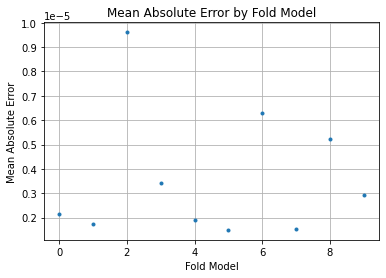

In [7]:
plt.plot(acc, '.')
plt.xlabel("Fold Model")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error by Fold Model")
plt.grid(True)

In [8]:
# Generate Total L^2 Error Data per fold
l2err = []
valerr = []
trainerr = []
ontime = []

for i in range(len(annmodels)):
    
    # Generate Predictions
    
    pred = annmodels[i].predict(train_val[i][0])
    predt = annmodels[i].predict(test_val[i][0])
    
    #Calculate Error
    tmpsum = 0
    for j in range(len(predt)): # Validation
        Norm1 = np.linalg.norm(test_val[i][1][j] - predt[j], 2)
        Norm2 = np.linalg.norm(predt[j], 2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
    valerr.append(math.sqrt(tmpsum))
    
    tmpsum2 = 0
    for k in range(len(pred)): # Training
        Norm1 = np.linalg.norm(train_val[i][1][k] - pred[k], 2)
        Norm2 = np.linalg.norm(pred[k], 2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
        tmpsum2 = tmpsum2 + ((Norm1**2)/(Norm2**2))
    
    trainerr.append(math.sqrt(tmpsum2))
    
    # Insert Error
    l2err.append(math.sqrt(tmpsum))

1/1 [==============================] - 0s 18ms/step


([<matplotlib.axis.XTick at 0x2a3d8bf94c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

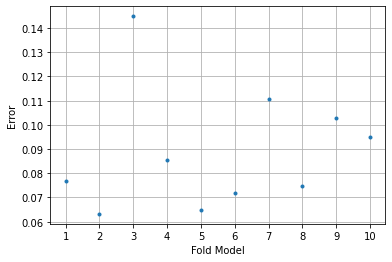

In [9]:
plt.plot(np.arange(1, 11, step=1), l2err, '.')
plt.xlabel("Fold Model")
plt.ylabel("Error")
plt.grid(True)
plt.xticks(np.arange(1, 11, step=1))

In [10]:
print(f"Average Frobenius Error for All Models: {np.mean(l2err)} (+- {np.std(l2err)})")
print(f"Mean Average Error for All Models: {np.mean(acc)} (+- {np.std(acc)})")

Average Frobenius Error for All Models: 0.08900017664256635 (+- 0.023965800545207683)
Mean Average Error for All Models: 3.6305291018834395e-06 (+- 2.5225689465946104e-06)


In [11]:
pltstore = []

tmpsum = 0
pred = annmodels[np.argmin(l2err)].predict(train_val[np.argmin(l2err)][0])
for k in range(len(pred)):
    Norm1 = np.linalg.norm(train_val[np.argmin(l2err)][1][k] - pred[k], 2)
    Norm2 = np.linalg.norm(pred[k], 2)
    pltstore.append(Norm1/Norm2)
    tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
pred = annmodels[np.argmin(l2err)].predict(test_val[np.argmin(l2err)][0])
for j in range(len(pred)):
        Norm1 = np.linalg.norm(test_val[np.argmin(l2err)][1][j] - pred[j], 2)
        Norm2 = np.linalg.norm(pred[j], 2)
        pltstore.append(Norm1/Norm2)
        tmpsum = tmpsum + ((Norm1**2)/(Norm2**2))
    
math.sqrt(tmpsum)

1/1 [==============================] - 0s 18ms/step


0.06321241952249189

In [12]:
xplot = np.concatenate((train_val[np.argmin(l2err)][0], test_val[np.argmin(l2err)][0]), axis=0)

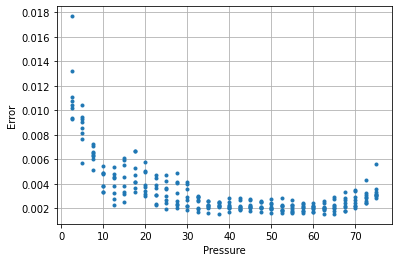

In [13]:
#Export Data Here

plt.plot(xplot[:,11], pltstore, '.')
plt.xlabel("Pressure")
plt.ylabel("Error")
plt.grid(True)

In [14]:
sum(totaltime)

519.7649364471436

In [15]:
for i in range(len(annmodels)):
    string = "model" + str(i) + ".h5"
    annmodels[i].save(string)

In [16]:
export = pd.DataFrame({'offline time': totaltime})
export.to_csv('offlineTime.csv', encoding = 'utf-8', index=False)
#export = pd.DataFrame({'offline time': totaltime,'online time': ontime, 'error':l2err})
#FileName = 'layer'+str(LAYERSIZE)+'epoch'+str(EPOCHS)+'.csv'
#export.to_csv(FileName, encoding = 'utf-8', index=False)